# Initialization

In [1]:
%pip install gensim
%pip install numpy
%pip install scipy==1.12 #erreur avec les versions récentes de scipy qui ne comportent plus certaines fonctions appelées par gensim.models 
%pip install nltk
%pip install matplotlib
%pip install transformers scikit-learn torch
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gensim
import math
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, squareform
nltk.download('punkt')  


[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [4]:
def euclidean_distance(vector1, vector2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vector1, vector2)))

def cosine_similarity(vector1, vector2):
    dot_product = sum(a * b for a, b in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(a ** 2 for a in vector1))
    magnitude2 = math.sqrt(sum(b ** 2 for b in vector2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0  # Pour éviter la division par zéro
    return dot_product / (magnitude1 * magnitude2)

# Clustering sans réduction de dimension 


In [15]:



words = [word for category in vocab.values() for word in category]
vectors = np.array([model[word] for word in words if word in model.key_to_index])
#print(vectors)

kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors)

print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Réduction à 2 dimensions.


['apple', 'banana', 'orange', 'grape', 'mango', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'car', 'bicycle', 'airplane', 'train', 'boat']
{'apple': array([-1.7714484 , -0.49598268], dtype=float32), 'banana': array([-1.4647027 , -0.46271217], dtype=float32), 'orange': array([-0.9672342 ,  0.02329792], dtype=float32), 'grape': array([-2.114062  , -0.41525877], dtype=float32), 'mango': array([-2.0365157 , -0.49958318], dtype=float32), 'dog': array([ 1.1540847 , -0.38541654], dtype=float32), 'cat': array([ 1.1230016 , -0.87229854], dtype=float32), 'elephant': array([ 1.1305835, -1.5545187], dtype=float32), 'tiger': array([ 1.4951004, -1.4630895], dtype=float32), 'lion': array([ 1.1661509, -1.2274776], dtype=float32), 'car': array([0.434753, 1.452348], dtype=float32), 'bicycle': array([0.4495822, 1.3132005], dtype=float32), 'airplane': array([0.2599642, 1.5347892], dtype=float32), 'train': array([0.5558949, 1.1902968], dtype=float32), 'boat': array([0.58484864, 1.8624043 ], dtype=float32)}


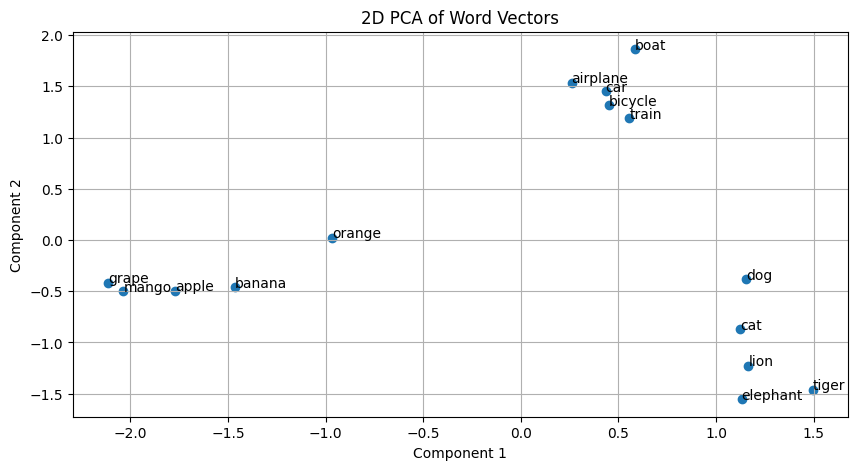

In [21]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]

print(words)

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}



print(vectors_after_pca)
print(vectors_after_pca["apple"])

# Visualisation en 2D
plt.figure(figsize=(10, 5))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()

In [38]:
print("distance euclidienne entre apple et banana avant acp : ", euclidean_distance(model["apple"],model["banana"]))
print("distance euclidienne entre apple et banana après acp : ", euclidean_distance(vectors_after_pca["apple"],vectors_after_pca["banana"]))
print("cosine similarity entre apple et banana avant acp : ", cosine_similarity(model["apple"],model["banana"]))
print("cosine similarity entre apple et banana après acp : ", cosine_similarity(vectors_after_pca["apple"],vectors_after_pca["banana"]))


print('\n')
print("distance euclidienne entre dog et boat avant acp : ", euclidean_distance(model["dog"], model["boat"]))
print("distance euclidienne entre dog et boat après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["boat"]))
print("cosine similarity entre dog et boat avant acp : ", cosine_similarity(model["dog"], model["boat"]))
print("cosine similarity entre dog et boat après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["boat"]))

print('\n')

print("distance euclidienne entre car et bicycle avant acp : ", euclidean_distance(model["car"], model["bicycle"]))
print("distance euclidienne entre car et bicycle après acp : ", euclidean_distance(vectors_after_pca["car"], vectors_after_pca["bicycle"]))
print("cosine similarity entre car et bicycle avant acp : ", cosine_similarity(model["car"], model["bicycle"]))
print("cosine similarity entre car et bicycle après acp : ", cosine_similarity(vectors_after_pca["car"], vectors_after_pca["bicycle"]))

print("\n")

print("distance euclidienne entre dog et orange avant acp : ", euclidean_distance(model["dog"], model["orange"]))
print("distance euclidienne entre dog et orange après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["orange"]))
print("cosine similarity entre dog et orange avant acp : ", cosine_similarity(model["dog"], model["orange"]))
print("cosine similarity entre dog et orange après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["orange"]))

print("\n")

print("distance euclidienne entre cat et cat avant acp : ", euclidean_distance(model["cat"], model["cat"]))
print("distance euclidienne entre cat et cat après acp : ", euclidean_distance(vectors_after_pca["cat"], vectors_after_pca["cat"]))
print("cosine similarity entre cat et cat avant acp : ", cosine_similarity(model["cat"], model["cat"]))
print("cosine similarity entre cat et cat après acp : ", cosine_similarity(vectors_after_pca["cat"], vectors_after_pca["cat"]))

distance euclidienne entre apple et banana avant acp :  2.9922431037694026
distance euclidienne entre apple et banana après acp :  0.308544679922608
cosine similarity entre apple et banana avant acp :  0.5318406129968402
cosine similarity entre apple et banana après acp :  0.9994558662516282


distance euclidienne entre dog et boat avant acp :  3.8055216454550305
distance euclidienne entre dog et boat après acp :  2.318777320460988
cosine similarity entre dog et boat avant acp :  0.22969708468824604
cosine similarity entre dog et boat après acp :  -0.018035182691556354


distance euclidienne entre car et bicycle avant acp :  2.7047768482218673
distance euclidienne entre car et bicycle après acp :  0.13993547503911588
cosine similarity entre car et bicycle avant acp :  0.5364484561983549
cosine similarity entre car et bicycle après acp :  0.999239852545396


distance euclidienne entre dog et orange avant acp :  3.8789927690548014
distance euclidienne entre dog et orange après acp :  2.1

## Interprétation pour cosine similarity : 

### Proche de 1 : Les vecteurs sont très similaires en direction. Par exemple, dans le traitement du langage naturel, deux documents avec une similarité cosinus proche de 1 ont des contenus très similaires. 

### Proche de 0 : Les vecteurs n'ont pas de similarité directionnelle. Cela peut signifier que les documents ou éléments comparés n'ont pas de caractéristiques communes. 

### Proche de -1 : Les vecteurs sont opposés en direction.

## Clustering K means 

[2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


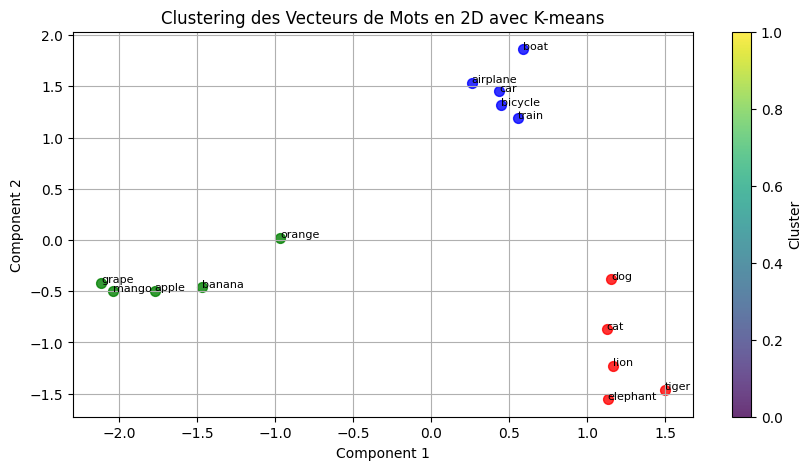

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors_pca)

print(cluster_labels)

color_cluster=[]
for i in cluster_labels : 
    if i ==2 :
        color_cluster.append("green")
    if i ==1 :
        color_cluster.append("blue")
    if i ==0 :
        color_cluster.append("red")

# Visualisation en 2D
plt.figure(figsize=(10, 5))

# Tracer les points avec couleurs selon les clusters
for i in range(len(words)):
    plt.scatter(vectors_pca[i, 0], vectors_pca[i, 1], c=color_cluster[i], s=50, alpha=0.8)

# Annoter les points avec les mots
for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]), fontsize=8)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering des Vecteurs de Mots en 2D avec K-means')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Réduction à 3 dimensions

['apple', 'banana', 'orange', 'grape', 'mango', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'car', 'bicycle', 'airplane', 'train', 'boat']
{'apple': array([-1.7714484 , -0.49598268,  0.39228398], dtype=float32), 'banana': array([-1.4647027 , -0.46271217,  0.01049725], dtype=float32), 'orange': array([-0.9672342 ,  0.02329792,  0.18633278], dtype=float32), 'grape': array([-2.114062  , -0.41525877,  0.11470293], dtype=float32), 'mango': array([-2.0365157 , -0.49958318, -0.47378525], dtype=float32), 'dog': array([ 1.1540847 , -0.38541654,  1.6363567 ], dtype=float32), 'cat': array([ 1.1230016 , -0.87229854,  1.585814  ], dtype=float32), 'elephant': array([ 1.1305835, -1.5545187, -1.138445 ], dtype=float32), 'tiger': array([ 1.4951004, -1.4630895, -0.807855 ], dtype=float32), 'lion': array([ 1.1661509, -1.2274776, -0.4166061], dtype=float32), 'car': array([0.434753  , 1.452348  , 0.17260335], dtype=float32), 'bicycle': array([0.4495822 , 1.3132005 , 0.11807834], dtype=float32), 'airplane': 

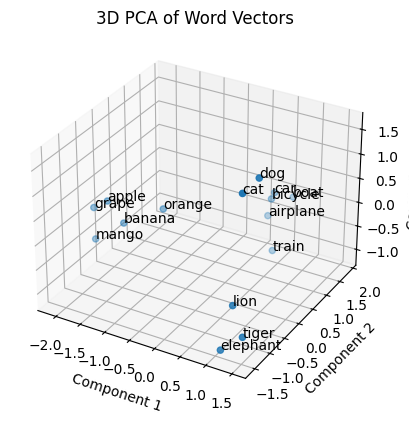

In [56]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]

print(words)

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}



print(vectors_after_pca)
print(vectors_after_pca["apple"])

# Visualisation en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vectors_pca[:, 0], vectors_pca[:, 1], vectors_pca[:, 2])

for i, word in enumerate(words):
    ax.text(vectors_pca[i, 0], vectors_pca[i, 1], vectors_pca[i, 2], word)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('3D PCA of Word Vectors')
plt.show()

In [57]:
print("distance euclidienne entre apple et banana avant acp : ", euclidean_distance(model["apple"],model["banana"]))
print("distance euclidienne entre apple et banana après acp : ", euclidean_distance(vectors_after_pca["apple"],vectors_after_pca["banana"]))
print("cosine similarity entre apple et banana avant acp : ", cosine_similarity(model["apple"],model["banana"]))
print("cosine similarity entre apple et banana après acp : ", cosine_similarity(vectors_after_pca["apple"],vectors_after_pca["banana"]))


print('\n')
print("distance euclidienne entre dog et boat avant acp : ", euclidean_distance(model["dog"], model["boat"]))
print("distance euclidienne entre dog et boat après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["boat"]))
print("cosine similarity entre dog et boat avant acp : ", cosine_similarity(model["dog"], model["boat"]))
print("cosine similarity entre dog et boat après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["boat"]))

print('\n')

print("distance euclidienne entre car et bicycle avant acp : ", euclidean_distance(model["car"], model["bicycle"]))
print("distance euclidienne entre car et bicycle après acp : ", euclidean_distance(vectors_after_pca["car"], vectors_after_pca["bicycle"]))
print("cosine similarity entre car et bicycle avant acp : ", cosine_similarity(model["car"], model["bicycle"]))
print("cosine similarity entre car et bicycle après acp : ", cosine_similarity(vectors_after_pca["car"], vectors_after_pca["bicycle"]))

print("\n")

print("distance euclidienne entre dog et orange avant acp : ", euclidean_distance(model["dog"], model["orange"]))
print("distance euclidienne entre dog et orange après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["orange"]))
print("cosine similarity entre dog et orange avant acp : ", cosine_similarity(model["dog"], model["orange"]))
print("cosine similarity entre dog et orange après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["orange"]))

print("\n")

print("distance euclidienne entre cat et cat avant acp : ", euclidean_distance(model["cat"], model["cat"]))
print("distance euclidienne entre cat et cat après acp : ", euclidean_distance(vectors_after_pca["cat"], vectors_after_pca["cat"]))
print("cosine similarity entre cat et cat avant acp : ", cosine_similarity(model["cat"], model["cat"]))
print("cosine similarity entre cat et cat après acp : ", cosine_similarity(vectors_after_pca["cat"], vectors_after_pca["cat"]))

distance euclidienne entre apple et banana avant acp :  2.9922431037694026
distance euclidienne entre apple et banana après acp :  0.4908777135544171
cosine similarity entre apple et banana avant acp :  0.5318406129968402
cosine similarity entre apple et banana après acp :  0.9788802395520485


distance euclidienne entre dog et boat avant acp :  3.8055216454550305
distance euclidienne entre dog et boat après acp :  2.894867719867179
cosine similarity entre dog et boat avant acp :  0.22969708468824604
cosine similarity entre dog et boat après acp :  -0.05045694873103146


distance euclidienne entre car et bicycle avant acp :  2.7047768482218673
distance euclidienne entre car et bicycle après acp :  0.15018293755879716
cosine similarity entre car et bicycle avant acp :  0.5364484561983549
cosine similarity entre car et bicycle après acp :  0.9988413595951522


distance euclidienne entre dog et orange avant acp :  3.8789927690548014
distance euclidienne entre dog et orange après acp :  2.

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors_pca)

print("clustering :",cluster_labels)

clustering : [2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


# Réduction à n dimensions 

In [5]:
n=10

In [2]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]

print("les mots sont : ",words)

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=n)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}



# print(vectors_after_pca)
print("le vecteur d'apple devient après réduction :", vectors_after_pca["apple"])


print("distance euclidienne entre apple et banana avant acp : ", euclidean_distance(model["apple"],model["banana"]))
print("distance euclidienne entre apple et banana après acp : ", euclidean_distance(vectors_after_pca["apple"],vectors_after_pca["banana"]))
print("cosine similarity entre apple et banana avant acp : ", cosine_similarity(model["apple"],model["banana"]))
print("cosine similarity entre apple et banana après acp : ", cosine_similarity(vectors_after_pca["apple"],vectors_after_pca["banana"]))


print('\n')
print("distance euclidienne entre dog et boat avant acp : ", euclidean_distance(model["dog"], model["boat"]))
print("distance euclidienne entre dog et boat après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["boat"]))
print("cosine similarity entre dog et boat avant acp : ", cosine_similarity(model["dog"], model["boat"]))
print("cosine similarity entre dog et boat après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["boat"]))

print('\n')

print("distance euclidienne entre car et bicycle avant acp : ", euclidean_distance(model["car"], model["bicycle"]))
print("distance euclidienne entre car et bicycle après acp : ", euclidean_distance(vectors_after_pca["car"], vectors_after_pca["bicycle"]))
print("cosine similarity entre car et bicycle avant acp : ", cosine_similarity(model["car"], model["bicycle"]))
print("cosine similarity entre car et bicycle après acp : ", cosine_similarity(vectors_after_pca["car"], vectors_after_pca["bicycle"]))

print("\n")

print("distance euclidienne entre dog et orange avant acp : ", euclidean_distance(model["dog"], model["orange"]))
print("distance euclidienne entre dog et orange après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["orange"]))
print("cosine similarity entre dog et orange avant acp : ", cosine_similarity(model["dog"], model["orange"]))
print("cosine similarity entre dog et orange après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["orange"]))

print("\n")

print("distance euclidienne entre cat et cat avant acp : ", euclidean_distance(model["cat"], model["cat"]))
print("distance euclidienne entre cat et cat après acp : ", euclidean_distance(vectors_after_pca["cat"], vectors_after_pca["cat"]))
print("cosine similarity entre cat et cat avant acp : ", cosine_similarity(model["cat"], model["cat"]))
print("cosine similarity entre cat et cat après acp : ", cosine_similarity(vectors_after_pca["cat"], vectors_after_pca["cat"]))


kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors_pca)

print('Le clustering de la versions réduite :', cluster_labels)

les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'car', 'bicycle', 'airplane', 'train', 'boat']


NameError: name 'np' is not defined

# Comparaison du nombre de dimensions de réduction


In [6]:
vocab = {
    "Fruits": [
        "apple", "banana", "orange", "grape", "mango", "pear", "pineapple", "strawberry", "blueberry", "kiwi", 
        "watermelon", "cherry", "peach", "plum", "apricot", "pomegranate", "fig", "coconut", "lime", "lemon", 
        "papaya", "passionfruit", "nectarine", "blackberry", "raspberry", "cranberry", "grapefruit", "persimmon", 
        "guava", "tangerine"
    ],
    "Animals": [
        "dog", "cat", "elephant", "tiger", "lion", "giraffe", "zebra", "kangaroo", "panda", "koala", 
        "dolphin", "shark", "eagle", "owl", "wolf", "bear", "fox", "rabbit", "deer", "moose", 
        "squirrel", "bat", "whale", "octopus", "penguin", "crocodile", "hippopotamus", "rhino", 
        "leopard", "jaguar"
    ],
    "Transport": [
        "car", "bicycle", "airplane", "train", "boat", "bus", "motorcycle", "subway", "helicopter", "scooter", 
        "tram", "ship", "truck", "van", "spaceship", "taxi", "skateboard", "hoverboard", "ferry", "canoe", 
        "kayak", "yacht", "cruise", "jet", "rickshaw", "segway", "trolley", "tractor", "moped", "gondola"
    ]
}


In [12]:
vocab = {
    "Fruits": [
        "apple", "banana", "orange", "grape", "mango", "pear", "pineapple", "strawberry", "blueberry", "kiwi",
        "watermelon", "cherry", "peach", "plum", "apricot", "pomegranate", "fig", "coconut", "lime", "lemon",
        "papaya", "passionfruit", "nectarine", "blackberry", "raspberry", "cranberry", "grapefruit", "persimmon",
        "guava", "tangerine", "jackfruit", "durian", "lychee", "quince", "date", "kumquat", "dragonfruit", "starfruit",
        "elderberry", "gooseberry", "mulberry", "currant", "physalis", "rambutan", "salak", "soursop", "tamarind", "cantaloupe",
        "honeydew", "miraclefruit", "ugli", "jabuticaba", "longan", "ackee", "mangosteen", "sapodilla", "santol", "bilberry",
        "acerola", "boysenberry", "kiwano", "cherimoya", "medlar", "nashi", "satsuma", "tangelo", "yuzu", "blood orange",
        "calamondin", "huckleberry", "jujube", "marionberry", "muscadine", "santol", "roseapple", "serviceberry", "aronia", "babaco",
        "bignay", "breadfruit", "chokeberry", "jambul", "lucuma", "mamoncillo", "mora", "naranjilla", "pineberry", "pulasan",
        "safou", "spondias", "velvetapple", "yumberry", "ziziphus", "horned melon", "loquat", "medlar", "surinam", "whitecurrant"
    ],
    "Animals": [
        "dog", "cat", "elephant", "tiger", "lion", "giraffe", "zebra", "kangaroo", "panda", "koala",
        "dolphin", "shark", "eagle", "owl", "wolf", "bear", "fox", "rabbit", "deer", "moose",
        "squirrel", "bat", "whale", "octopus", "penguin", "crocodile", "hippopotamus", "rhino",
        "leopard", "jaguar", "cheetah", "chimpanzee", "gorilla", "orangutan", "baboon", "meerkat", "lemur", "sloth",
        "armadillo", "porcupine", "platypus", "opossum", "raccoon", "beaver", "skunk", "wolverine", "lynx", "caracal",
        "serval", "mongoose", "hyena", "antelope", "bison", "buffalo", "camel", "donkey", "ferret", "gerbil",
        "hamster", "hedgehog", "mole", "mouse", "rat", "vole", "weasel", "badger", "boar", "chipmunk",
        "dugong", "gazelle", "ibex", "impala", "jackal", "kudu", "llama", "marmot", "mink", "otter",
        "pika", "quokka", "quoll", "tapir", "vicuna", "wallaby", "warthog", "wombat", "yak", "zorilla",
        "buzzard", "falcon", "heron", "kingfisher", "macaw", "ostrich", "peacock", "toucan", "mynah", "parrot",
        "parakeet", "goldfinch", "puffin", "sandpiper", "sparrow", "stork", "swallow", "swift", "tern", "vulture"
    ],
    "Transport": [
        "car", "bicycle", "airplane", "train", "boat", "bus", "motorcycle", "subway", "helicopter", "scooter",
        "tram", "ship", "truck", "van", "spaceship", "taxi", "skateboard", "hoverboard", "ferry", "canoe",
        "kayak", "yacht", "cruise", "jet", "rickshaw", "segway", "trolley", "tractor", "moped", "gondola",
        "ambulance", "biplane", "bulldozer", "cart", "catamaran", "cementmixer", "combine", "crane", "dumper", "excavator",
        "firetruck", "forklift", "glider", "golfcart", "hovercraft", "hydrofoil", "jetski", "jetliner", "limo", "lorry",
        "minibus", "minivan", "monorail", "paraglider", "pogo", "quadbike", "roller", "rowboat", "sailboat", "seaplane",
        "snowmobile", "speedboat", "steamroller", "tank", "tricycle", "unicycle", "wrecker", "zeppelin", "sidecar", "snowcat",
        "snowplow", "spaceshuttle", "streetcar", "tanktruck", "tramcar", "trolleybus", "scooter", "wheelbarrow", "yacht", "dinghy"
    ]
}


# Comparaison des inter-distance

## Avec la distance euclidienne

In [ ]:
words = [word for category in vocab.values() for word in category]

print("les mots sont : ",words)

vectors = np.array([model[word] for word in words if word in model.key_to_index])

n_max = 11

def calculate_min_distances(n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    print(f'Le clustering de la version réduite avec n={n} :', cluster_labels)

    # Fonction pour calculer les distances minimales entre paires de clusters
    def min_distances_between_clusters(vectors_pca, cluster_labels):
        distances = {}
        clusters = np.unique(cluster_labels)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = vectors_pca[cluster_labels == clusters[i]]
                cluster_j = vectors_pca[cluster_labels == clusters[j]]
                distance = np.min(cdist(cluster_i, cluster_j, 'euclidean'))
                distances[(clusters[i], clusters[j])] = distance
        return distances

    # Calcul des distances minimales entre les clusters
    min_distances = min_distances_between_clusters(vectors_pca, cluster_labels)
    return min_distances

# Initialisation des listes pour stocker les distances
distances_dict = {pair: [] for pair in [(0, 1), (0, 2), (1, 2)]}

# Calcul des distances pour n de 2 à 10
for n in range(2, n_max):
    min_distances = calculate_min_distances(n)
    for pair in distances_dict:
        distances_dict[pair].append(min_distances.get(pair, np.nan))

# Tracé des distances minimales
plt.figure(figsize=(10, 6))
for pair, distances in distances_dict.items():
    plt.plot(range(2, n_max), distances, label=f'Cluster {pair[0]}-{pair[1]}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Distance minimale')
plt.title('Distance minimale entre clusters en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

## Avec la cosine distance

les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'pear', 'pineapple', 'strawberry', 'blueberry', 'kiwi', 'watermelon', 'cherry', 'peach', 'plum', 'apricot', 'pomegranate', 'fig', 'coconut', 'lime', 'lemon', 'papaya', 'passionfruit', 'nectarine', 'blackberry', 'raspberry', 'cranberry', 'grapefruit', 'persimmon', 'guava', 'tangerine', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'kangaroo', 'panda', 'koala', 'dolphin', 'shark', 'eagle', 'owl', 'wolf', 'bear', 'fox', 'rabbit', 'deer', 'moose', 'squirrel', 'bat', 'whale', 'octopus', 'penguin', 'crocodile', 'hippopotamus', 'rhino', 'leopard', 'jaguar', 'car', 'bicycle', 'airplane', 'train', 'boat', 'bus', 'motorcycle', 'subway', 'helicopter', 'scooter', 'tram', 'ship', 'truck', 'van', 'spaceship', 'taxi', 'skateboard', 'hoverboard', 'ferry', 'canoe', 'kayak', 'yacht', 'cruise', 'jet', 'rickshaw', 'segway', 'trolley', 'tractor', 'moped', 'gondola']
Le clustering de la version réduite avec n=2 : [2 2 2 2 2 2 

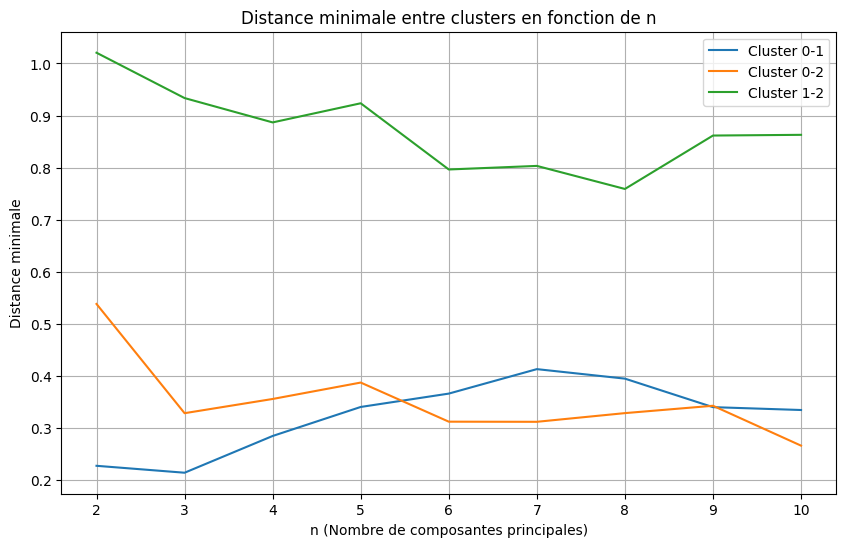

In [47]:
words = [word for category in vocab.values() for word in category]

print("les mots sont : ",words)

vectors = np.array([model[word] for word in words])

n_max = 11

def calculate_min_distances(n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    print(f'Le clustering de la version réduite avec n={n} :', cluster_labels)

    # Fonction pour calculer les distances minimales entre paires de clusters
    def min_distances_between_clusters(vectors_pca, cluster_labels):
        distances = {}
        clusters = np.unique(cluster_labels)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = vectors_pca[cluster_labels == clusters[i]]
                cluster_j = vectors_pca[cluster_labels == clusters[j]]
                distance = np.min(cdist(cluster_i, cluster_j, 'cosine'))
                distances[(clusters[i], clusters[j])] = distance
        return distances

    # Calcul des distances minimales entre les clusters
    min_distances = min_distances_between_clusters(vectors_pca, cluster_labels)
    return min_distances

# Initialisation des listes pour stocker les distances
distances_dict = {pair: [] for pair in [(0, 1), (0, 2), (1, 2)]}

# Calcul des distances pour n de 2 à 10
for n in range(2, n_max):
    min_distances = calculate_min_distances(n)
    for pair in distances_dict:
        distances_dict[pair].append(min_distances.get(pair, np.nan))

# Tracé des distances minimales
plt.figure(figsize=(10, 6))
for pair, distances in distances_dict.items():
    plt.plot(range(2, n_max), distances, label=f'Cluster {pair[0]}-{pair[1]}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Distance minimale')
plt.title('Distance minimale entre clusters en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

## Avec la cosine similarity comme distance (avant normailisation)

les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'pear', 'pineapple', 'strawberry', 'blueberry', 'kiwi', 'watermelon', 'cherry', 'peach', 'plum', 'apricot', 'pomegranate', 'fig', 'coconut', 'lime', 'lemon', 'papaya', 'passionfruit', 'nectarine', 'blackberry', 'raspberry', 'cranberry', 'grapefruit', 'persimmon', 'guava', 'tangerine', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'kangaroo', 'panda', 'koala', 'dolphin', 'shark', 'eagle', 'owl', 'wolf', 'bear', 'fox', 'rabbit', 'deer', 'moose', 'squirrel', 'bat', 'whale', 'octopus', 'penguin', 'crocodile', 'hippopotamus', 'rhino', 'leopard', 'jaguar', 'car', 'bicycle', 'airplane', 'train', 'boat', 'bus', 'motorcycle', 'subway', 'helicopter', 'scooter', 'tram', 'ship', 'truck', 'van', 'spaceship', 'taxi', 'skateboard', 'hoverboard', 'ferry', 'canoe', 'kayak', 'yacht', 'cruise', 'jet', 'rickshaw', 'segway', 'trolley', 'tractor', 'moped', 'gondola']
Le clustering de la version réduite avec n=2 : [2 2 2 2 2 2 

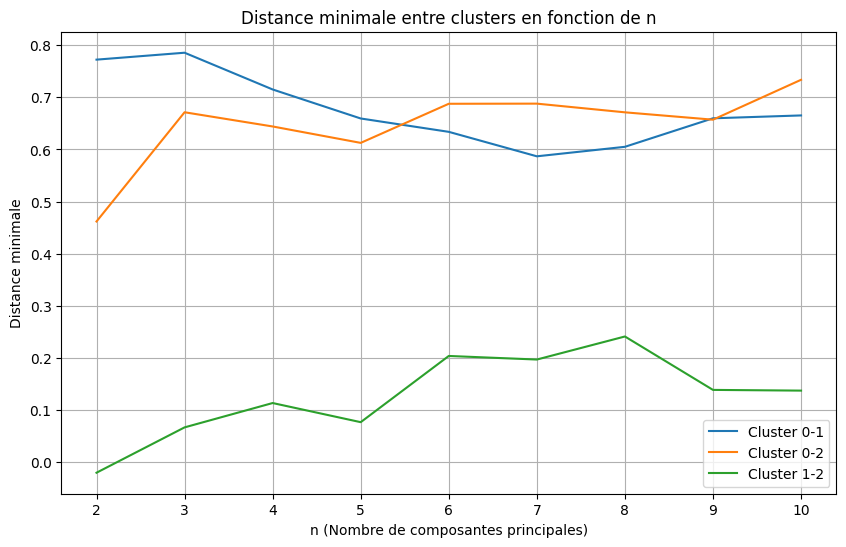

In [48]:
words = [word for category in vocab.values() for word in category]

print("les mots sont : ",words)

vectors = np.array([model[word] for word in words])

n_max = 11

def calculate_min_distances(n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    print(f'Le clustering de la version réduite avec n={n} :', cluster_labels)

    # Fonction pour calculer les distances minimales entre paires de clusters
    def min_distances_between_clusters(vectors_pca, cluster_labels):
        distances = {}
        clusters = np.unique(cluster_labels)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = vectors_pca[cluster_labels == clusters[i]]
                cluster_j = vectors_pca[cluster_labels == clusters[j]]
                max_similarity = float('-inf')
                for vec_i in cluster_i:
                    for vec_j in cluster_j:
                        similarity = cosine_similarity(vec_i, vec_j)
                        if similarity > max_similarity:
                            max_similarity = similarity
                distances[(clusters[i], clusters[j])] = max_similarity
        return distances

    # Calcul des distances minimales entre les clusters
    min_distances = min_distances_between_clusters(vectors_pca, cluster_labels)
    return min_distances

# Initialisation des listes pour stocker les distances
distances_dict = {pair: [] for pair in [(0, 1), (0, 2), (1, 2)]}

# Calcul des distances pour n de 2 à 10
for n in range(2, n_max):
    min_distances = calculate_min_distances(n)
    for pair in distances_dict:
        distances_dict[pair].append(min_distances.get(pair, np.nan))

# Tracé des distances minimales
plt.figure(figsize=(10, 6))
for pair, distances in distances_dict.items():
    plt.plot(range(2, n_max), distances, label=f'Cluster {pair[0]}-{pair[1]}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Distance minimale')
plt.title('Distance minimale entre clusters en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

## Idem après normalisation

In [44]:
# Extraire les vecteurs pour les mots présents dans le modèle
words = [word for category in vocab.values() for word in category]

vectors = np.array([model[word] for word in words if word in model.key_to_index])

# Calculer les normes des vecteurs avant normalisation
norms_before = np.linalg.norm(vectors, axis=1)
print(norms_before)

# Normaliser les vecteurs
vectors_normalized = vectors / norms_before[:, np.newaxis]

# Vérifier les normes après normalisation
norms_after = np.linalg.norm(vectors_normalized, axis=1)

print(norms_after)

n_max = 11

def calculate_min_distances(n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(norms_after)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    print(f'Le clustering de la version réduite avec n={n} :', cluster_labels)

    # Fonction pour calculer les distances minimales entre paires de clusters
    def min_distances_between_clusters(vectors_pca, cluster_labels):
        distances = {}
        clusters = np.unique(cluster_labels)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = vectors_pca[cluster_labels == clusters[i]]
                cluster_j = vectors_pca[cluster_labels == clusters[j]]
                max_similarity = float('-inf')
                for vec_i in cluster_i:
                    for vec_j in cluster_j:
                        similarity = cosine_similarity(vec_i, vec_j)
                        if similarity > max_similarity:
                            max_similarity = similarity
                distances[(clusters[i], clusters[j])] = max_similarity
        return distances

    # Calcul des distances minimales entre les clusters
    min_distances = min_distances_between_clusters(vectors_pca, cluster_labels)
    return min_distances

# Initialisation des listes pour stocker les distances
distances_dict = {pair: [] for pair in [(0, 1), (0, 2), (1, 2)]}

# Calcul des distances pour n de 2 à 10
for n in range(2, n_max):
    min_distances = calculate_min_distances(n)
    for pair in distances_dict:
        distances_dict[pair].append(min_distances.get(pair, np.nan))

# Tracé des distances minimales
plt.figure(figsize=(10, 6))
for pair, distances in distances_dict.items():
    plt.plot(range(2, n_max), distances, label=f'Cluster {pair[0]}-{pair[1]}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Distance minimale')
plt.title('Distance minimale entre clusters en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

[3.142654  3.0391605 2.8603978 3.487138  3.3314042 3.173052  3.2954967
 3.1477768 3.3058307 3.8154047 3.185929  2.9867013 2.9252892 3.1833522
 3.219917  3.4574168 3.1304038 3.278702  3.1461248 3.086479  3.7031522
 3.1342187 3.3668728 3.2765357 3.1410525 3.4667113 3.5419934 3.525349
 3.4396594 3.1496804 2.9811234 3.0376644 3.4463725 3.4922857 3.0681353
 3.3933482 3.4419773 3.3782516 4.0719814 4.367033  3.6307654 4.0479145
 3.6490757 3.293859  3.7715259 2.8708885 3.1606638 2.7691205 3.6746695
 3.724816  3.1355608 3.3357632 3.8439646 3.8193347 3.5417993 3.7852397
 3.5618973 3.9271507 3.6972487 4.3365245 2.6472194 2.9448006 3.0622392
 2.81005   3.1472313 2.984936  3.0933833 3.8542657 3.4491773 3.0737612
 3.553006  2.9840147 2.9116113 3.174049  3.6983254 3.27193   3.263652
 3.2622313 3.425852  3.3288255 3.505825  3.8634782 3.160547  3.2141879
 3.8392127 2.5324159 3.0902026 3.309436  3.1731715 3.785675 ]
[0.99999994 0.99999994 1.         0.99999994 0.99999994 1.
 0.99999994 1.         1.    

ValueError: Expected 2D array, got 1D array instead:
array=[0.99999994 0.99999994 1.         0.99999994 0.99999994 1.
 0.99999994 1.         1.         1.         0.99999994 1.
 1.         1.         1.         1.         0.9999999  1.
 1.         0.99999994 1.         0.99999994 1.         1.
 0.99999994 0.99999994 1.         1.         1.         0.99999994
 1.         1.         0.99999994 1.         1.         0.99999994
 1.         1.         0.99999994 1.         0.99999994 1.
 1.         1.         1.         1.         1.         1.
 1.         0.99999994 1.         1.         1.         1.
 1.         1.         0.99999994 1.         1.         1.0000001
 1.         1.         1.         1.         1.         0.99999994
 1.         1.         1.         1.         0.99999994 1.
 0.99999994 1.         1.         1.         0.9999999  0.99999994
 1.         1.         1.         1.         0.99999994 1.
 1.         0.99999994 1.         1.         1.         0.99999994].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Comparaison des intra distances (boxplot)

## Avec la distance eucldienne

In [5]:
words = [word for category in vocab.values() for word in category]
print("Les mots sont : ", words)

n_max = 11

vectors = np.array([model[word] for word in words if word in model.key_to_index])

print(vectors)


def calculate_intra_cluster_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            distances = pdist(cluster_vectors, 'euclidean')
            intra_cluster_distances[i].extend(distances)
    return intra_cluster_distances

# Initialisation des listes pour stocker les distances intra-cluster
intra_distances = {i: {n: [] for n in range(2, n_max)} for i in range(3)}

# Calcul des distances intra-cluster pour n de 2 à 10
for n in range(2, n_max):
    distances = calculate_intra_cluster_distances(vectors, n)
    for i in range(3):
        intra_distances[i][n].extend(distances[i])

# Tracé des boxplots
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    data = [intra_distances[i][n] for n in range(2, n_max)]
    plt.boxplot(data, positions=range(2, n_max))
    plt.xlabel('n (Nombre de composantes principales)')
    plt.ylabel('Distance intra-cluster')
    plt.title(f'Cluster {i}')
    plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'vocab' is not defined

## Pour n_max = 90

Les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'pear', 'pineapple', 'strawberry', 'blueberry', 'kiwi', 'watermelon', 'cherry', 'peach', 'plum', 'apricot', 'pomegranate', 'fig', 'coconut', 'lime', 'lemon', 'papaya', 'passionfruit', 'nectarine', 'blackberry', 'raspberry', 'cranberry', 'grapefruit', 'persimmon', 'guava', 'tangerine', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'kangaroo', 'panda', 'koala', 'dolphin', 'shark', 'eagle', 'owl', 'wolf', 'bear', 'fox', 'rabbit', 'deer', 'moose', 'squirrel', 'bat', 'whale', 'octopus', 'penguin', 'crocodile', 'hippopotamus', 'rhino', 'leopard', 'jaguar', 'car', 'bicycle', 'airplane', 'train', 'boat', 'bus', 'motorcycle', 'subway', 'helicopter', 'scooter', 'tram', 'ship', 'truck', 'van', 'spaceship', 'taxi', 'skateboard', 'hoverboard', 'ferry', 'canoe', 'kayak', 'yacht', 'cruise', 'jet', 'rickshaw', 'segway', 'trolley', 'tractor', 'moped', 'gondola']


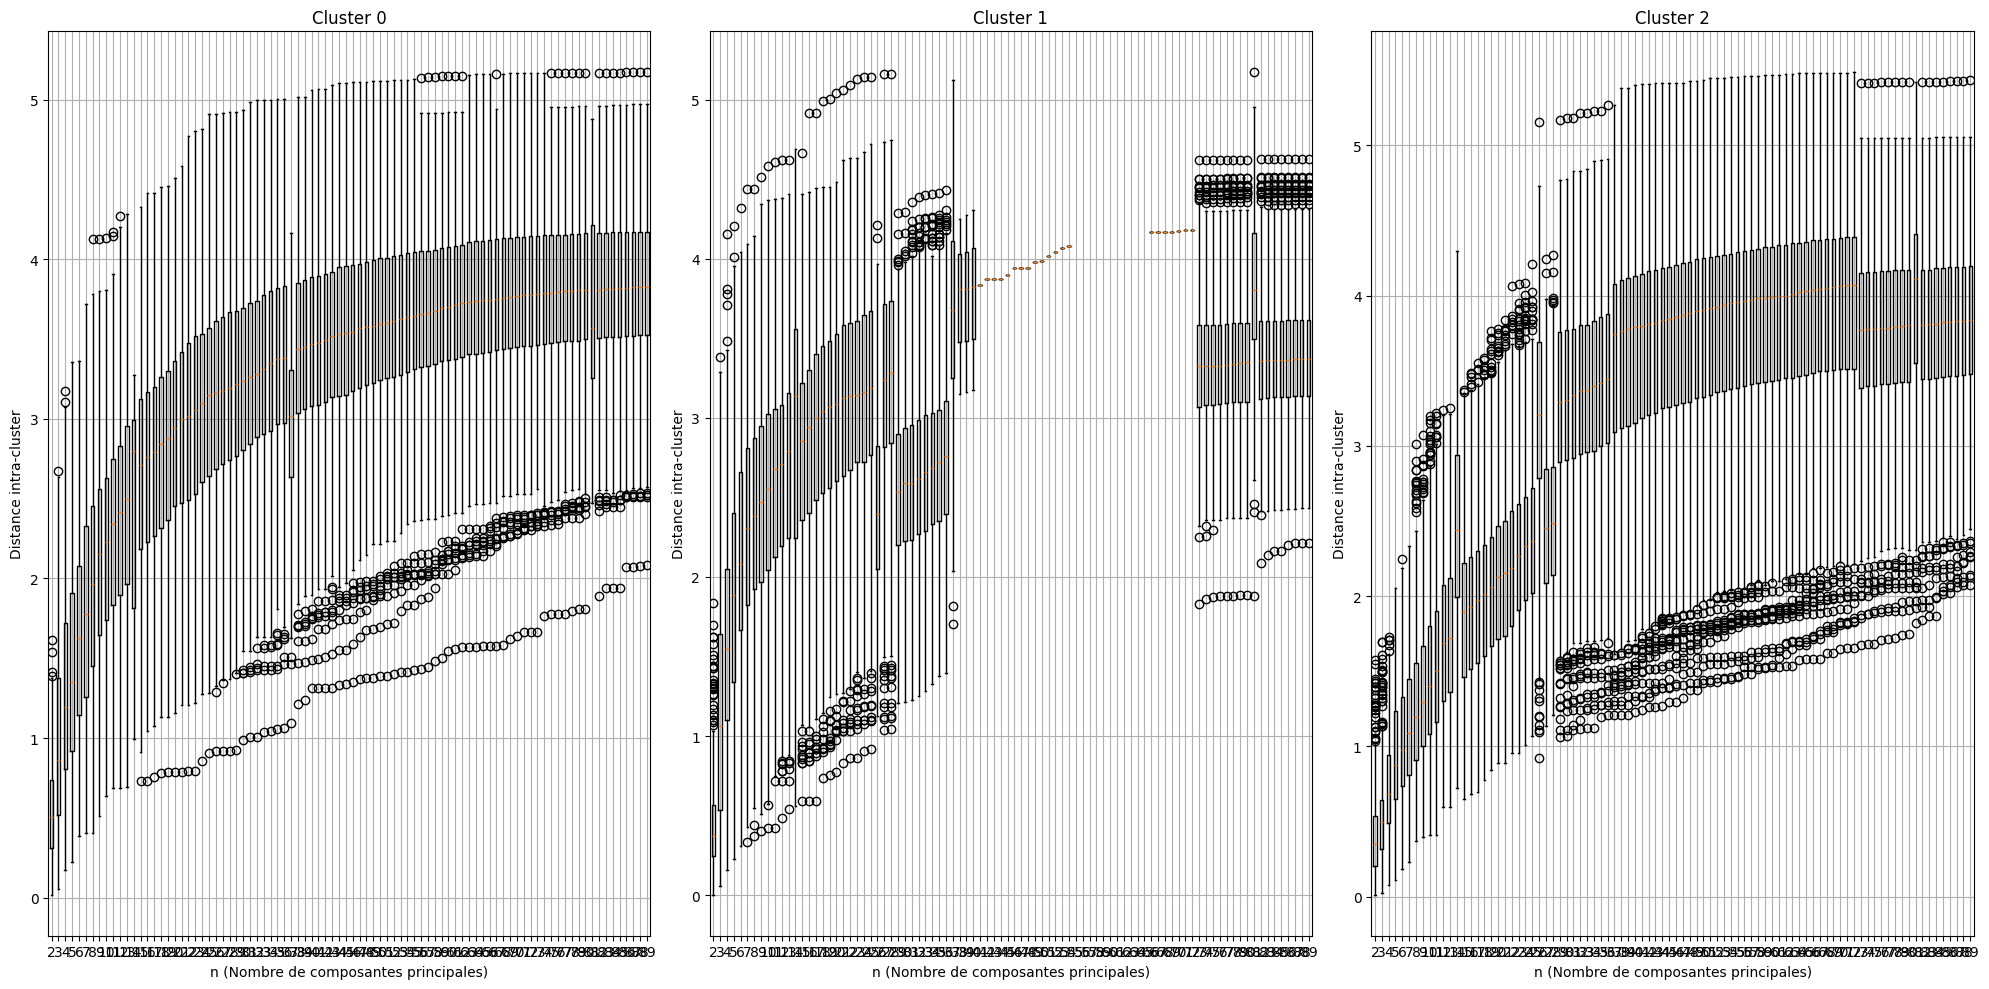

In [50]:
words = [word for category in vocab.values() for word in category]
print("Les mots sont : ", words)

n_max = 90

vectors = np.array([model[word] for word in words if word in model.key_to_index])


def calculate_intra_cluster_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            distances = pdist(cluster_vectors, 'euclidean')
            intra_cluster_distances[i].extend(distances)
    return intra_cluster_distances

# Initialisation des listes pour stocker les distances intra-cluster
intra_distances = {i: {n: [] for n in range(2, n_max)} for i in range(3)}

# Calcul des distances intra-cluster pour n de 2 à 10
for n in range(2, n_max):
    distances = calculate_intra_cluster_distances(vectors, n)
    for i in range(3):
        intra_distances[i][n].extend(distances[i])

# Tracé des boxplots
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    data = [intra_distances[i][n] for n in range(2, n_max)]
    plt.boxplot(data, positions=range(2, n_max))
    plt.xlabel('n (Nombre de composantes principales)')
    plt.ylabel('Distance intra-cluster')
    plt.title(f'Cluster {i}')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Avec cosine distance : While cosine similarity measures how similar two vectors are, cosine distance measures how different they are. (cosine distnce = 1 - cosine similarity)

Les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'pear', 'pineapple', 'strawberry', 'blueberry', 'kiwi', 'watermelon', 'cherry', 'peach', 'plum', 'apricot', 'pomegranate', 'fig', 'coconut', 'lime', 'lemon', 'papaya', 'passionfruit', 'nectarine', 'blackberry', 'raspberry', 'cranberry', 'grapefruit', 'persimmon', 'guava', 'tangerine', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'kangaroo', 'panda', 'koala', 'dolphin', 'shark', 'eagle', 'owl', 'wolf', 'bear', 'fox', 'rabbit', 'deer', 'moose', 'squirrel', 'bat', 'whale', 'octopus', 'penguin', 'crocodile', 'hippopotamus', 'rhino', 'leopard', 'jaguar', 'car', 'bicycle', 'airplane', 'train', 'boat', 'bus', 'motorcycle', 'subway', 'helicopter', 'scooter', 'tram', 'ship', 'truck', 'van', 'spaceship', 'taxi', 'skateboard', 'hoverboard', 'ferry', 'canoe', 'kayak', 'yacht', 'cruise', 'jet', 'rickshaw', 'segway', 'trolley', 'tractor', 'moped', 'gondola']


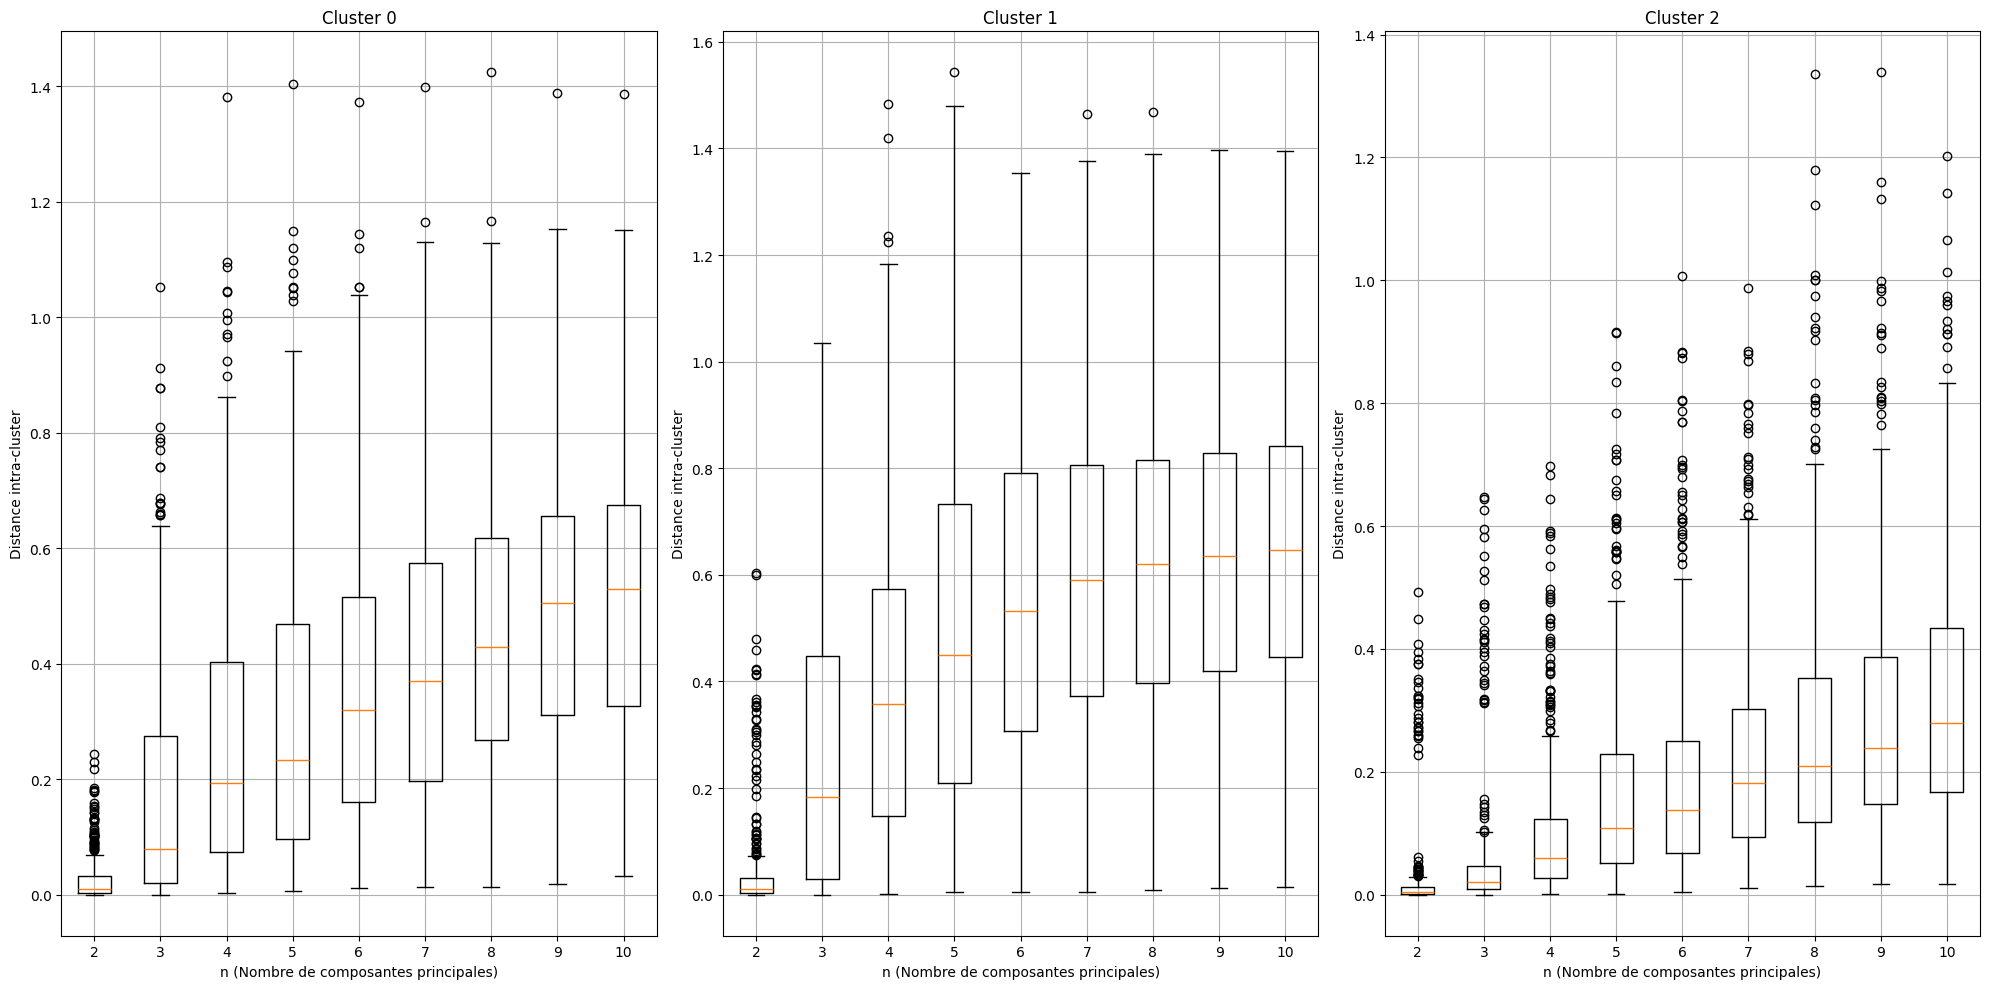

In [51]:
words = [word for category in vocab.values() for word in category]
print("Les mots sont : ", words)


vectors = np.array([model[word] for word in words if word in model.key_to_index])


def calculate_intra_cluster_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            distances = pdist(cluster_vectors, 'cosine')
            intra_cluster_distances[i].extend(distances)
    return intra_cluster_distances

# Initialisation des listes pour stocker les distances intra-cluster
intra_distances = {i: {n: [] for n in range(2, 11)} for i in range(3)}

# Calcul des distances intra-cluster pour n de 2 à 10
for n in range(2, 11):
    distances = calculate_intra_cluster_distances(vectors, n)
    for i in range(3):
        intra_distances[i][n].extend(distances[i])

# Tracé des boxplots
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    data = [intra_distances[i][n] for n in range(2, 11)]
    plt.boxplot(data, positions=range(2, 11))
    plt.xlabel('n (Nombre de composantes principales)')
    plt.ylabel('Distance intra-cluster')
    plt.title(f'Cluster {i}')
    plt.grid(True)

plt.tight_layout()
plt.show()

## With cosine similarity 

Les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'pear', 'pineapple', 'strawberry', 'blueberry', 'kiwi', 'watermelon', 'cherry', 'peach', 'plum', 'apricot', 'pomegranate', 'fig', 'coconut', 'lime', 'lemon', 'papaya', 'passionfruit', 'nectarine', 'blackberry', 'raspberry', 'cranberry', 'grapefruit', 'persimmon', 'guava', 'tangerine', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'kangaroo', 'panda', 'koala', 'dolphin', 'shark', 'eagle', 'owl', 'wolf', 'bear', 'fox', 'rabbit', 'deer', 'moose', 'squirrel', 'bat', 'whale', 'octopus', 'penguin', 'crocodile', 'hippopotamus', 'rhino', 'leopard', 'jaguar', 'car', 'bicycle', 'airplane', 'train', 'boat', 'bus', 'motorcycle', 'subway', 'helicopter', 'scooter', 'tram', 'ship', 'truck', 'van', 'spaceship', 'taxi', 'skateboard', 'hoverboard', 'ferry', 'canoe', 'kayak', 'yacht', 'cruise', 'jet', 'rickshaw', 'segway', 'trolley', 'tractor', 'moped', 'gondola']


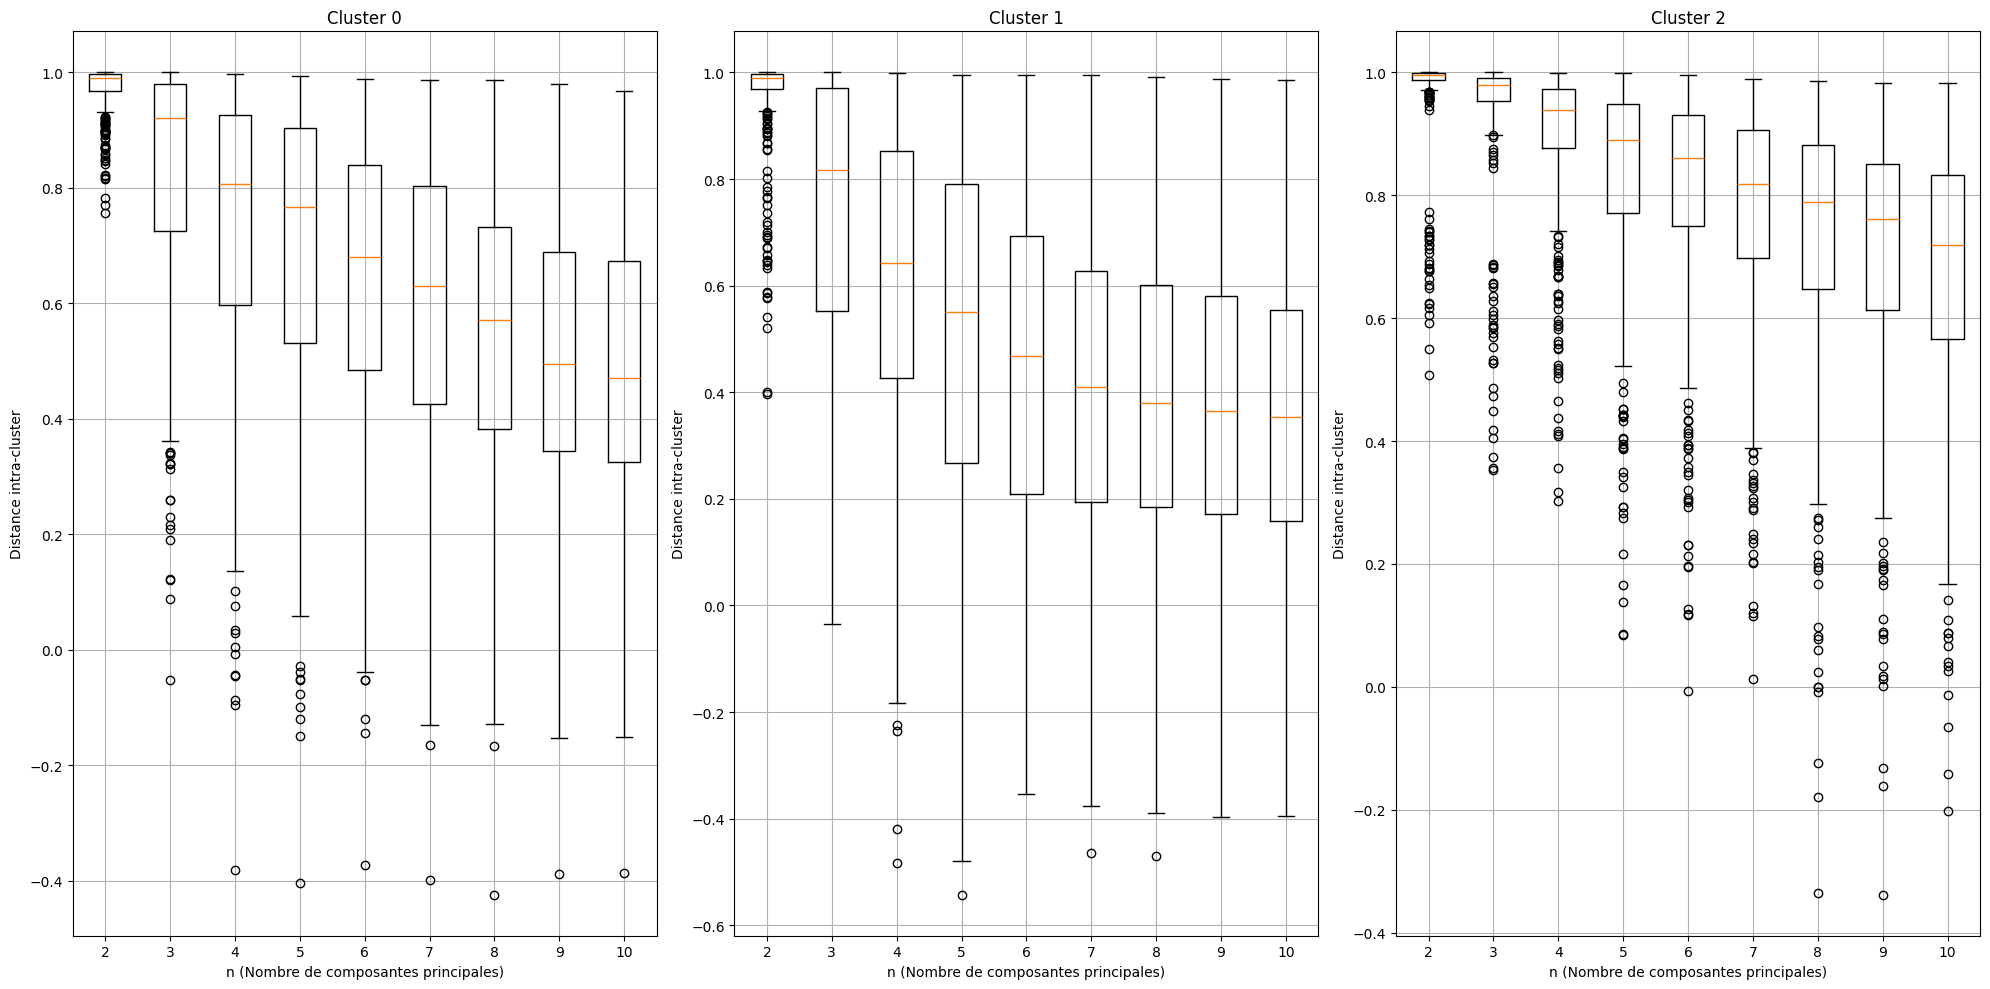

In [52]:
words = [word for category in vocab.values() for word in category]
print("Les mots sont : ", words)


vectors = np.array([model[word] for word in words if word in model.key_to_index])


def calculate_intra_cluster_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            for j in range(len(cluster_vectors)):
                for k in range(j + 1, len(cluster_vectors)):
                    similarity = cosine_similarity(cluster_vectors[j], cluster_vectors[k])
                    intra_cluster_distances[i].append(similarity)
    return intra_cluster_distances

# Initialisation des listes pour stocker les distances intra-cluster
intra_distances = {i: {n: [] for n in range(2, 11)} for i in range(3)}

# Calcul des distances intra-cluster pour n de 2 à 10
for n in range(2, 11):
    distances = calculate_intra_cluster_distances(vectors, n)
    for i in range(3):
        intra_distances[i][n].extend(distances[i])

# Tracé des boxplots
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    data = [intra_distances[i][n] for n in range(2, 11)]
    plt.boxplot(data, positions=range(2, 11))
    plt.xlabel('n (Nombre de composantes principales)')
    plt.ylabel('Distance intra-cluster')
    plt.title(f'Cluster {i}')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Ratio intra cluster inter cluster


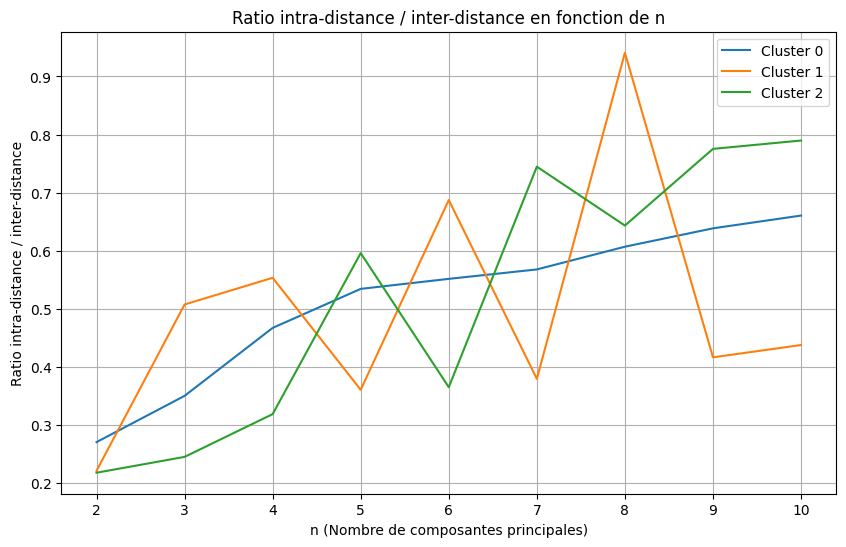

In [13]:
# List of words and corresponding vectors (example data)
words = [word for category in vocab.values() for word in category]
vectors = np.array([model[word] for word in words if word in model.key_to_index])

n_max = 11

def calculate_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            distances = pdist(cluster_vectors, 'euclidean')
            intra_cluster_distances[i] = np.mean(distances)

    # Calcul des distances inter-cluster
    inter_cluster_distances = []
    clusters = np.unique(cluster_labels)
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            cluster_i = vectors_pca[cluster_labels == clusters[i]]
            cluster_j = vectors_pca[cluster_labels == clusters[j]]
            distance = np.mean(cdist(cluster_i, cluster_j, 'euclidean'))
            inter_cluster_distances.append(distance)

    avg_inter_distance = np.mean(inter_cluster_distances)

    return intra_cluster_distances, avg_inter_distance

# Initialisation des listes pour stocker les distances et ratios
intra_distances = {i: [] for i in range(3)}
inter_distances = []
ratios = {i: [] for i in range(3)}

# Calcul des distances et ratios pour n de 2 à 10
for n in range(2, n_max):
    intra_cluster_distances, avg_inter_distance = calculate_distances(vectors, n)
    inter_distances.append(avg_inter_distance)
    for i in range(3):
        intra_distances[i].append(intra_cluster_distances[i])
        ratios[i].append(intra_cluster_distances[i] / avg_inter_distance)

# Tracé des ratios
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(range(2, n_max), ratios[i], label=f'Cluster {i}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Ratio intra-distance / inter-distance')
plt.title('Ratio intra-distance / inter-distance en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

# Normalisation 

Les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'pear', 'pineapple', 'strawberry', 'blueberry', 'kiwi', 'watermelon', 'cherry', 'peach', 'plum', 'apricot', 'pomegranate', 'fig', 'coconut', 'lime', 'lemon', 'papaya', 'passionfruit', 'nectarine', 'blackberry', 'raspberry', 'cranberry', 'grapefruit', 'persimmon', 'guava', 'tangerine', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'kangaroo', 'panda', 'koala', 'dolphin', 'shark', 'eagle', 'owl', 'wolf', 'bear', 'fox', 'rabbit', 'deer', 'moose', 'squirrel', 'bat', 'whale', 'octopus', 'penguin', 'crocodile', 'hippopotamus', 'rhino', 'leopard', 'jaguar', 'car', 'bicycle', 'airplane', 'train', 'boat', 'bus', 'motorcycle', 'subway', 'helicopter', 'scooter', 'tram', 'ship', 'truck', 'van', 'spaceship', 'taxi', 'skateboard', 'hoverboard', 'ferry', 'canoe', 'kayak', 'yacht', 'cruise', 'jet', 'rickshaw', 'segway', 'trolley', 'tractor', 'moped', 'gondola']
[3.142654  3.0391605 2.8603978 3.487138  3.3314042 3.173052 

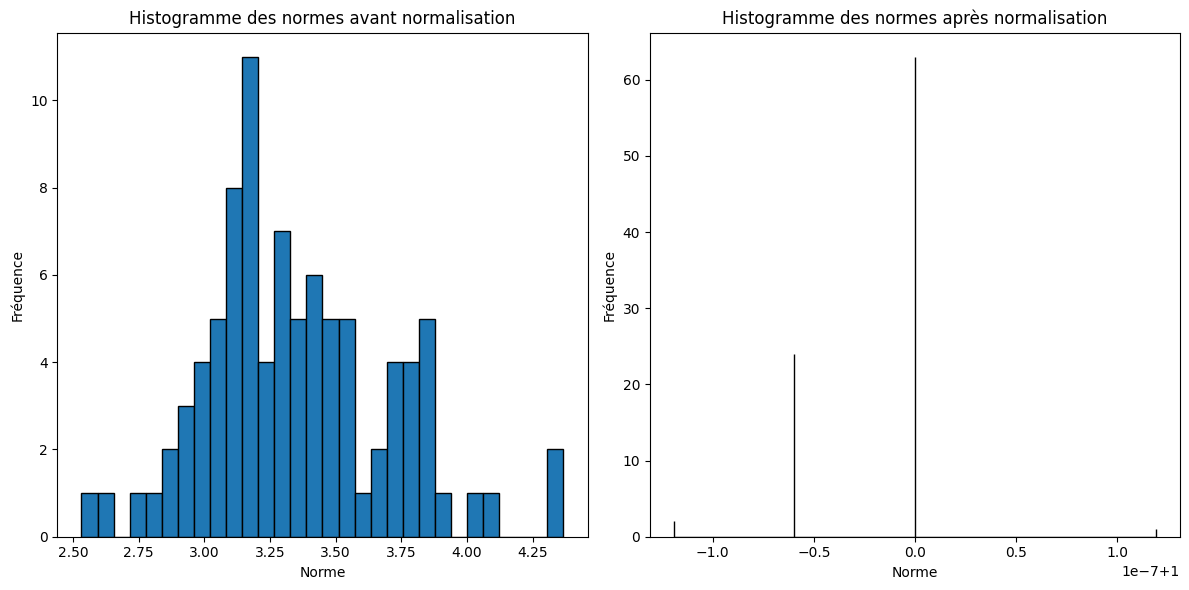

In [6]:
words = [word for category in vocab.values() for word in category]
print("Les mots sont : ", words)

# Extraire les vecteurs pour les mots présents dans le modèle
vectors = np.array([model[word] for word in words if word in model.key_to_index])

# Calculer les normes des vecteurs avant normalisation
norms_before = np.linalg.norm(vectors, axis=1)
print(norms_before)

# Normaliser les vecteurs
vectors_normalized = vectors / norms_before[:, np.newaxis]

# Vérifier les normes après normalisation
norms_after = np.linalg.norm(vectors_normalized, axis=1)

# Générer un histogramme des normes avant normalisation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(norms_before, bins=30, edgecolor='black')
plt.title('Histogramme des normes avant normalisation')
plt.xlabel('Norme')
plt.ylabel('Fréquence')

# Générer un histogramme des normes après normalisation
plt.subplot(1, 2, 2)
plt.hist(norms_after, bins=30, edgecolor='black')
plt.title('Histogramme des normes après normalisation')
plt.xlabel('Norme')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Expérience sur des lois gaussiennes multivariés.

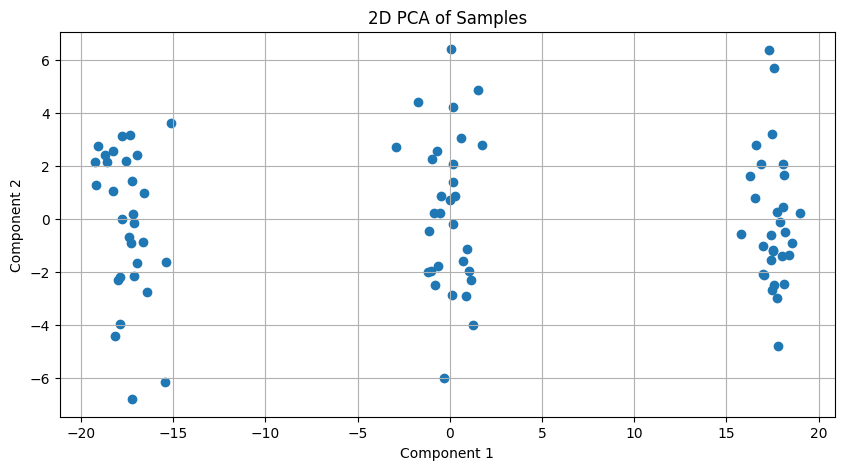

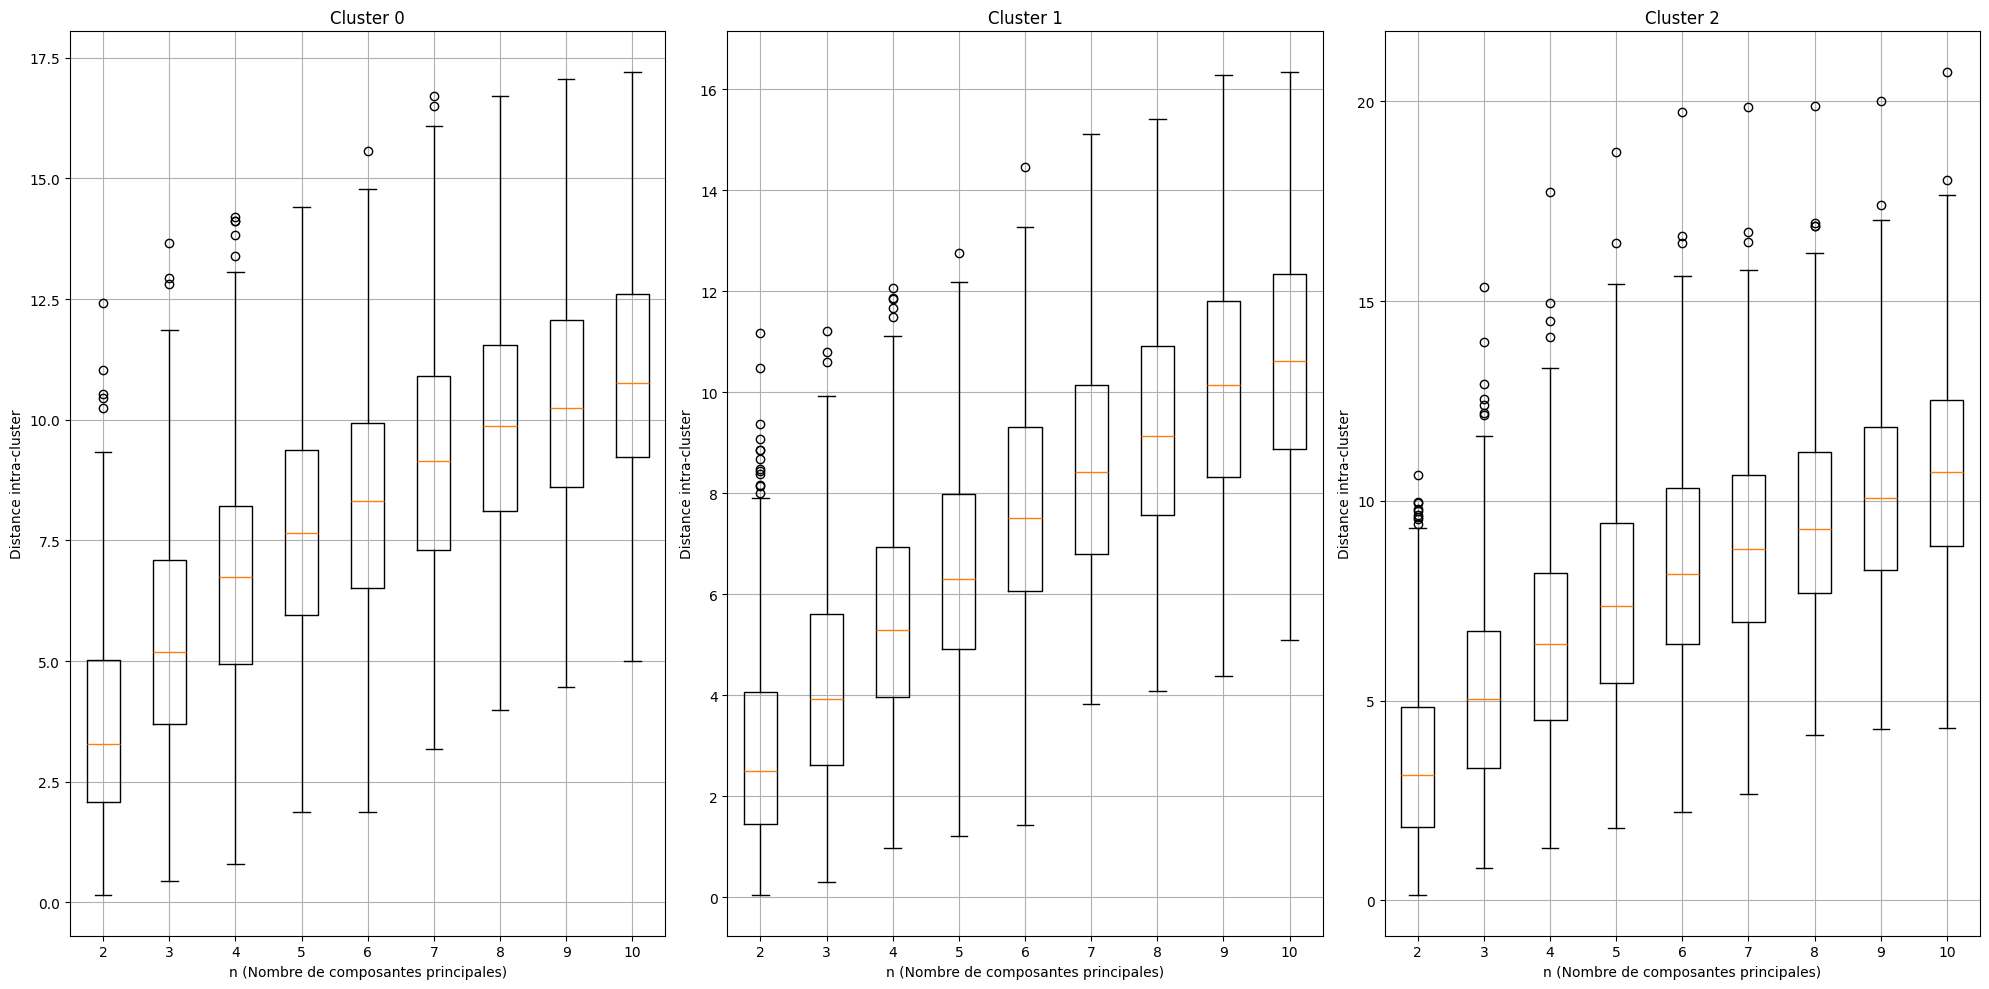

Le clustering de la version réduite avec n=2 : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Le clustering de la version réduite avec n=3 : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Le clustering de la version réduite avec n=4 : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Le clustering de la version réduite avec n=5 : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Le clustering de la version réduite avec n=6 : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 

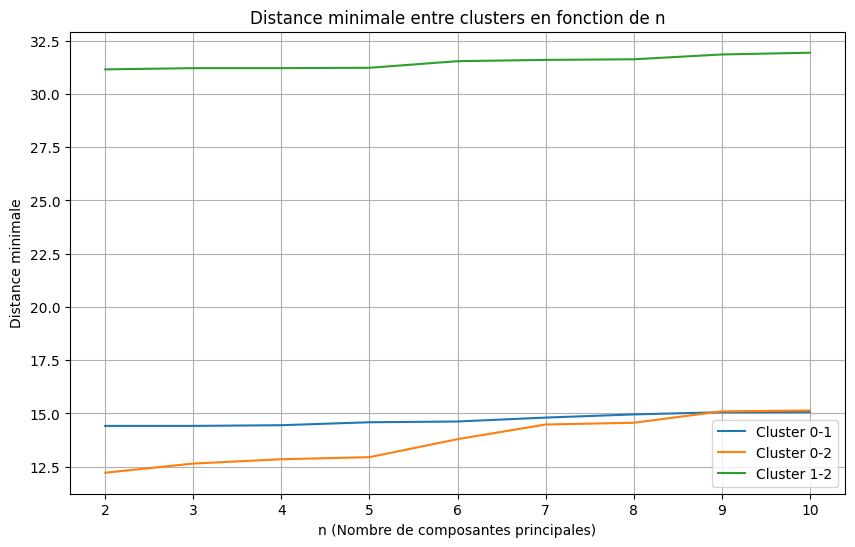

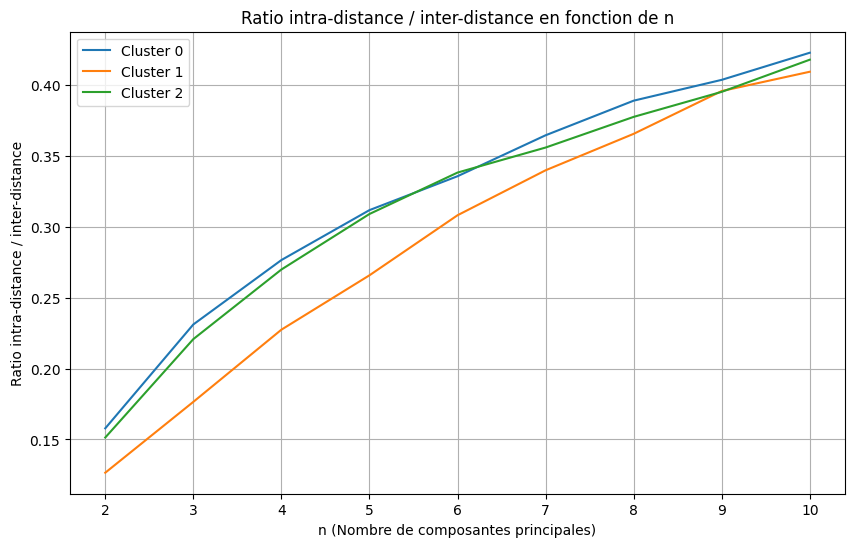

In [5]:
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

import numpy as np

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2


cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution, ce qui correspond au nombre de mots par catégorie
n_samples = 30

# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# print(len(samples1))
# print(len(samples1[0]))

ll_samples = np.concatenate((samples1, samples2, samples3))


# print("Distribution 1 samples:\n", samples1[:5], "\n")
# print("Distribution 2 samples:\n", samples2[:5], "\n")
# print("Distribution 3 samples:\n", samples3[:5], "\n")


# Créer un objet PCA pour réduire la dimensionnalité à 2
pca = PCA(n_components=2)

# Ajuster le modèle PCA aux données et transformer les échantillons
reduced_samples = pca.fit_transform(ll_samples)

# Visualisation en 2D
plt.figure(figsize=(10, 5))
plt.scatter(reduced_samples[:, 0], reduced_samples[:, 1])


plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Samples')
plt.grid(True)
plt.show()


n_max=11


def calculate_intra_cluster_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            distances = pdist(cluster_vectors, 'euclidean')
            intra_cluster_distances[i].extend(distances)
    return intra_cluster_distances

# Initialisation des listes pour stocker les distances intra-cluster
intra_distances = {i: {n: [] for n in range(2, n_max)} for i in range(3)}

# Calcul des distances intra-cluster pour n de 2 à 10
for n in range(2, n_max):
    distances = calculate_intra_cluster_distances(ll_samples, n)
    for i in range(3):
        intra_distances[i][n].extend(distances[i])

# Tracé des boxplots
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    data = [intra_distances[i][n] for n in range(2, n_max)]
    plt.boxplot(data, positions=range(2, n_max))
    plt.xlabel('n (Nombre de composantes principales)')
    plt.ylabel('Distance intra-cluster')
    plt.title(f'Cluster {i}')
    plt.grid(True)

plt.tight_layout()
plt.show()


def calculate_min_distances(n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(ll_samples)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    print(f'Le clustering de la version réduite avec n={n} :', cluster_labels)

    # Fonction pour calculer les distances minimales entre paires de clusters
    def min_distances_between_clusters(vectors_pca, cluster_labels):
        distances = {}
        clusters = np.unique(cluster_labels)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = vectors_pca[cluster_labels == clusters[i]]
                cluster_j = vectors_pca[cluster_labels == clusters[j]]
                distance = np.min(cdist(cluster_i, cluster_j, 'euclidean'))
                distances[(clusters[i], clusters[j])] = distance
        return distances

    # Calcul des distances minimales entre les clusters
    min_distances = min_distances_between_clusters(vectors_pca, cluster_labels)
    return min_distances

# Initialisation des listes pour stocker les distances
distances_dict = {pair: [] for pair in [(0, 1), (0, 2), (1, 2)]}

# Calcul des distances pour n de 2 à 10
for n in range(2, n_max):
    min_distances = calculate_min_distances(n)
    for pair in distances_dict:
        distances_dict[pair].append(min_distances.get(pair, np.nan))

# Tracé des distances minimales
plt.figure(figsize=(10, 6))
for pair, distances in distances_dict.items():
    plt.plot(range(2, n_max), distances, label=f'Cluster {pair[0]}-{pair[1]}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Distance minimale')
plt.title('Distance minimale entre clusters en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

n_max=11

def calculate_distances(vectors, n):
    # Réduction de dimension à l'aide de PCA
    pca = PCA(n_components=n)
    vectors_pca = pca.fit_transform(vectors)

    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    cluster_labels = kmeans.fit_predict(vectors_pca)

    # Calcul des distances intra-cluster
    intra_cluster_distances = {i: [] for i in range(3)}
    for i in range(3):
        cluster_vectors = vectors_pca[cluster_labels == i]
        if len(cluster_vectors) > 1:
            distances = pdist(cluster_vectors, 'euclidean')
            intra_cluster_distances[i] = np.mean(distances)

    # Calcul des distances inter-cluster
    inter_cluster_distances = []
    clusters = np.unique(cluster_labels)
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            cluster_i = vectors_pca[cluster_labels == clusters[i]]
            cluster_j = vectors_pca[cluster_labels == clusters[j]]
            distance = np.mean(cdist(cluster_i, cluster_j, 'euclidean'))
            inter_cluster_distances.append(distance)

    avg_inter_distance = np.mean(inter_cluster_distances)

    return intra_cluster_distances, avg_inter_distance

# Initialisation des listes pour stocker les distances et ratios
intra_distances = {i: [] for i in range(3)}
inter_distances = []
ratios = {i: [] for i in range(3)}

# Calcul des distances et ratios pour n de 2 à 10
for n in range(2, n_max):
    intra_cluster_distances, avg_inter_distance = calculate_distances(ll_samples, n)
    inter_distances.append(avg_inter_distance)
    for i in range(3):
        intra_distances[i].append(intra_cluster_distances[i])
        ratios[i].append(intra_cluster_distances[i] / avg_inter_distance)

# Tracé des ratios
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(range(2, n_max), ratios[i], label=f'Cluster {i}')

plt.xlabel('n (Nombre de composantes principales)')
plt.ylabel('Ratio intra-distance / inter-distance')
plt.title('Ratio intra-distance / inter-distance en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

# Kernel density estimation

### Exemple classique

x[:5] :  [-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996]
density[:5] :  [1.28274077e-14 1.71456683e-14 2.28797175e-14 3.04808884e-14
 4.05401459e-14]


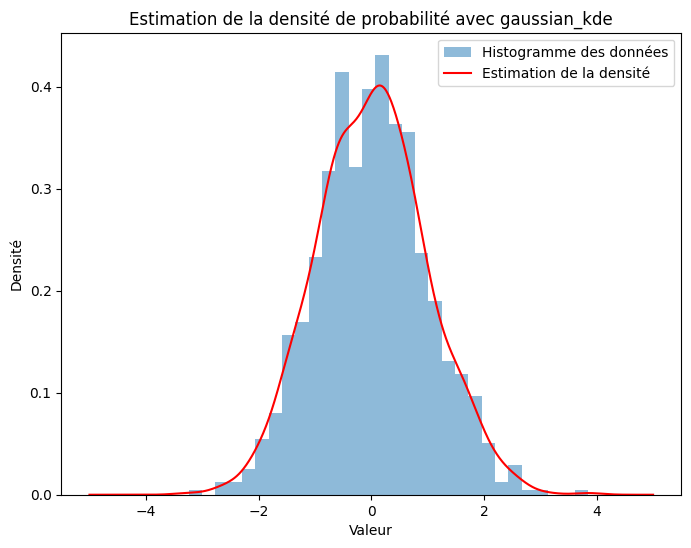

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Génération de données aléatoires suivant une distribution normale
np.random.seed(42)  # Pour la reproductibilité
data = np.random.normal(loc=0, scale=1, size=1000)

# Création de l'objet kde pour l'estimation de la densité
kde = gaussian_kde(data)


# Définition d'un ensemble de points où nous allons évaluer la densité
x = np.linspace(-5, 5, 1000)

density = kde(x)

print("x[:5] : ",x[:5])
print("density[:5] : ",density[:5])

# Traçage des résultats
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogramme des données')
plt.plot(x, density, label='Estimation de la densité', color='red')
plt.title('Estimation de la densité de probabilité avec gaussian_kde')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.legend()
plt.show()


## Test avec 2 lois normales

[-1.75164292 -2.06913215 -1.67615573 -1.23848507 -2.11707669]
[0.00027308 0.00028817 0.00030402 0.00032069 0.0003382  0.0003566
 0.00037592 0.00039622 0.00041752 0.00043989]


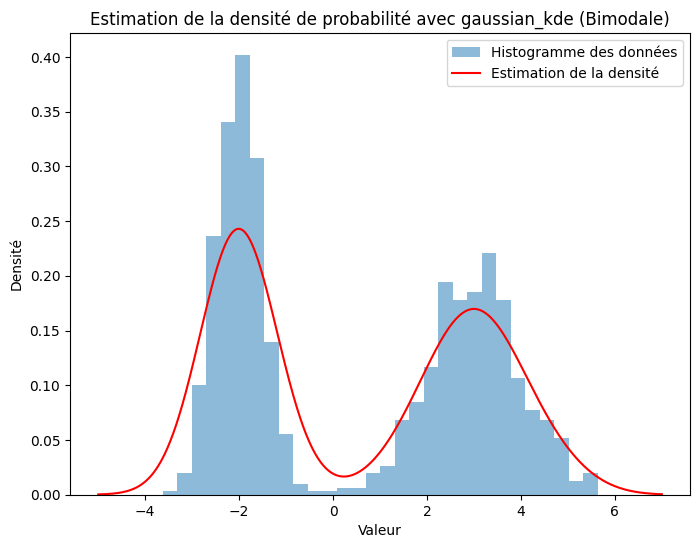

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Génération de données pour une distribution bimodale
np.random.seed(42)  


data1 = np.random.normal(loc=-2, scale=0.5, size=500)
data2 = np.random.normal(loc=3, scale=1, size=500)
data = np.concatenate([data1, data2])
print(data[:5])

# Création de l'objet kde pour l'estimation de la densité
kde = gaussian_kde(data)

# Définition d'un ensemble de points où nous allons évaluer la densité
x = np.linspace(-5, 7, 1000)
density = kde(x)
print(density[:10])

# Traçage des résultats
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogramme des données')
plt.plot(x, density, label='Estimation de la densité', color='red')
plt.title('Estimation de la densité de probabilité avec gaussian_kde (Bimodale)')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.legend()
plt.show()


## Test pour une loi uniforme

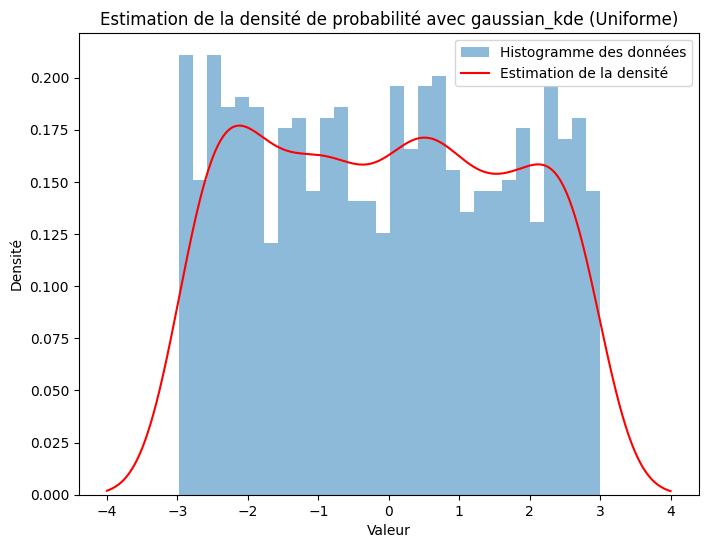

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Génération de données pour une distribution uniforme
np.random.seed(42)  # Pour la reproductibilité
data = np.random.uniform(low=-3, high=3, size=1000)

# Création de l'objet kde pour l'estimation de la densité
kde = gaussian_kde(data)

# Définition d'un ensemble de points où nous allons évaluer la densité
x = np.linspace(-4, 4, 1000)
density = kde(x)

# Traçage des résultats
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogramme des données')
plt.plot(x, density, label='Estimation de la densité', color='red')
plt.title('Estimation de la densité de probabilité avec gaussian_kde (Uniforme)')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.legend()
plt.show()


## Test de gaussian_kde pour n=3 pour exemple simple


[31332.15254989 16789.1960975   2085.90455406 22565.579828
 27253.56587895 28526.70371062 13959.73941712  3939.1325311
 30419.92764865  9100.23270944]
1000


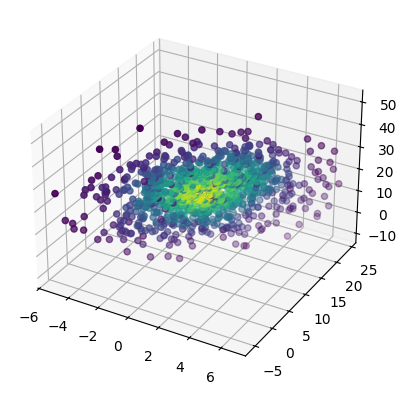

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)
density = kde(values)

print(density[:10])

print(len(density))

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

## Test de Gaussiant_kde pour n = 2 (ACP) dans notre exemple

Densité estimée pour les points d'intérêt :
[[2.43570114e-05 2.54438165e-05 2.65839780e-05 ... 1.19955364e-05
  1.09666854e-05 1.00479616e-05]
 [3.24183030e-05 3.36829917e-05 3.49849345e-05 ... 1.46103890e-05
  1.35060883e-05 1.25120113e-05]
 [4.29765383e-05 4.44613166e-05 4.59600340e-05 ... 1.80376349e-05
  1.68493958e-05 1.57690903e-05]
 ...
 [3.86455511e-04 3.91782613e-04 3.95909681e-04 ... 7.42871935e-06
  7.03912530e-06 6.67636669e-06]
 [3.87704192e-04 3.93041491e-04 3.97169011e-04 ... 5.48398696e-06
  5.16462506e-06 4.87017715e-06]
 [3.83789678e-04 3.89071410e-04 3.93150780e-04 ... 4.02741670e-06
  3.76823582e-06 3.53131976e-06]]


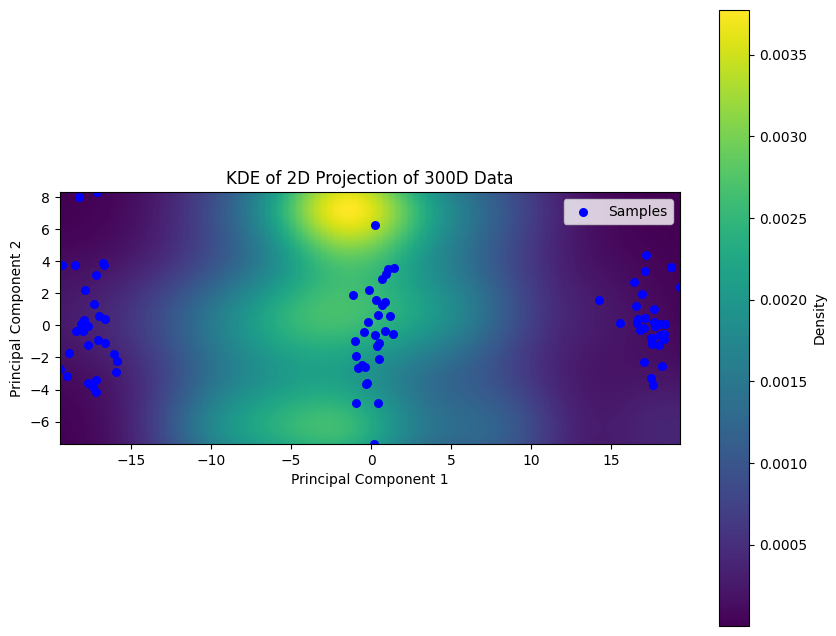

In [13]:
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution, ce qui correspond au nombre de mots par catégorie
n_samples = 30

# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Réduire les dimensions des données à 2D pour la visualisation avec PCA
pca = PCA(n_components=2)
ll_samples_2d = pca.fit_transform(ll_samples)

# Créer un modèle KDE avec les échantillons réduits
kde_2d = gaussian_kde(ll_samples_2d.T)

# Évaluer la densité pour les données réduites
x, y = np.meshgrid(np.linspace(ll_samples_2d[:,0].min(), ll_samples_2d[:,0].max(), 100),
                   np.linspace(ll_samples_2d[:,1].min(), ll_samples_2d[:,1].max(), 100))
positions = np.vstack([x.ravel(), y.ravel()])
density_2d = kde_2d(positions).reshape(x.shape)

print("Densité estimée pour les points d'intérêt :")
print(density_2d)

# Tracer les données projetées en 2D et la densité estimée
plt.figure(figsize=(10, 8))
plt.scatter(ll_samples_2d[:, 0], ll_samples_2d[:, 1], s=30, c='blue', label='Samples')
plt.imshow(np.rot90(density_2d), cmap=plt.cm.viridis, extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(label='Density')
plt.title('KDE of 2D Projection of 300D Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Interprétation des résultats :
### Points projetés en 2D :
Les points bleus représentent les échantillons des trois distributions après réduction des dimensions à 2D. Chaque point correspond à un échantillon original de 300 dimensions projeté dans un espace à 2 dimensions.

### Carte de chaleur de la densité estimée :
La carte de chaleur (heatmap) superposée montre la densité estimée des points. Les zones avec des couleurs plus chaudes (valeurs de densité plus élevées) indiquent où les points sont plus concentrés, tandis que les zones avec des couleurs plus froides (valeurs de densité plus basses) montrent des régions moins densément peuplées.

## Test de Gaussiant_kde pour n = 3 (ACP)

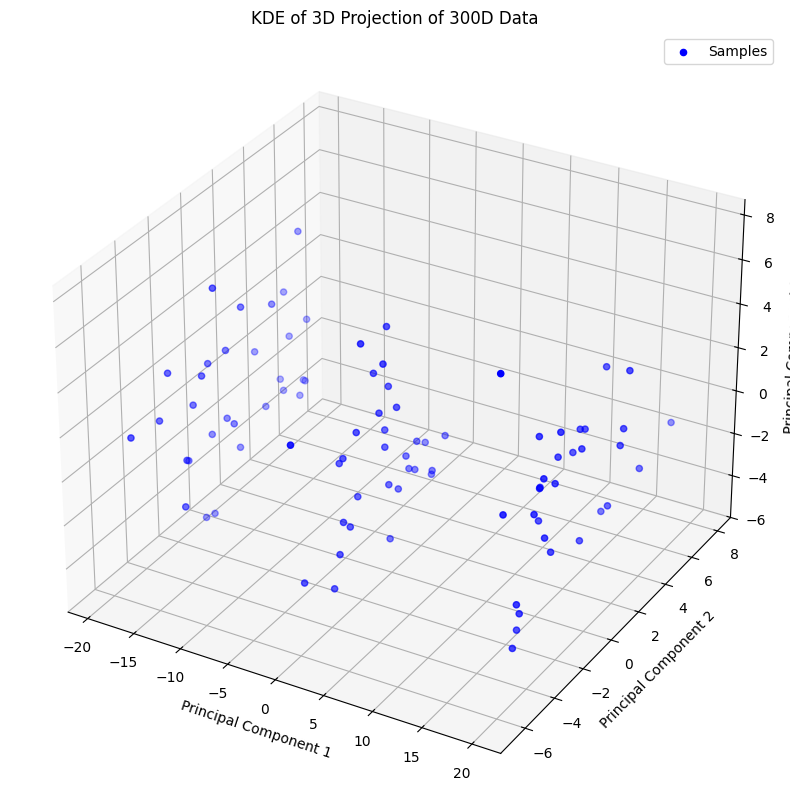

In [15]:
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution
n_samples = 30

# Générer des échantillons aléatoires pour les trois distributions
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Réduire les dimensions des données à 3D pour la visualisation avec PCA
pca = PCA(n_components=3)
ll_samples_3d = pca.fit_transform(ll_samples)

# Créer un modèle KDE avec les échantillons réduits
kde_3d = gaussian_kde(ll_samples_3d.T)

# Créer une grille pour évaluer la densité en 3D
x = np.linspace(ll_samples_3d[:, 0].min(), ll_samples_3d[:, 0].max(), 30)
y = np.linspace(ll_samples_3d[:, 1].min(), ll_samples_3d[:, 1].max(), 30)
z = np.linspace(ll_samples_3d[:, 2].min(), ll_samples_3d[:, 2].max(), 30)
x, y, z = np.meshgrid(x, y, z)
positions = np.vstack([x.ravel(), y.ravel(), z.ravel()])
density_3d = kde_3d(positions).reshape(x.shape)

# Afficher les données projetées et la densité estimée en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points de données
sc = ax.scatter(ll_samples_3d[:, 0], ll_samples_3d[:, 1], ll_samples_3d[:, 2], c='blue', label='Samples')

# Créer une surface de densité (approximative) pour la visualisation
# Note : Le calcul et l'affichage exact de la surface de densité en 3D peuvent être complexes
# Ici, on trace des points de la densité estimée pour la démonstration
# Une visualisation complète de la surface de densité nécessiterait des techniques plus avancées
# comme des contours de densité ou des volumes rendus
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('KDE of 3D Projection of 300D Data')
plt.legend()
plt.show()


## test avec n = 4

In [23]:
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution
n_samples = 30

# Générer des échantillons aléatoires pour les trois distributions
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Réduire les dimensions des données à 3D pour la visualisation avec PCA
pca = PCA(n_components=4)
ll_samples_3d = pca.fit_transform(ll_samples)

# Créer un modèle KDE avec les échantillons réduits
kde_3d = gaussian_kde(ll_samples_3d.T)

# Créer une grille pour évaluer la densité en 3D
x = np.linspace(ll_samples_3d[:, 0].min(), ll_samples_3d[:, 0].max(), 30)
y = np.linspace(ll_samples_3d[:, 1].min(), ll_samples_3d[:, 1].max(), 30)
z = np.linspace(ll_samples_3d[:, 2].min(), ll_samples_3d[:, 2].max(), 30)
p = np.linspace(ll_samples_3d[:, 3].min(), ll_samples_3d[:, 3].max(), 30)
x, y, z ,p = np.meshgrid(x, y, z, p)
positions = np.vstack([x.ravel(), y.ravel(), z.ravel(),  p.ravel()])
density_3d = kde_3d(positions).reshape(x.shape)



## Test avec n quelconque

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution
n_samples = 30

# Générer des échantillons aléatoires pour les trois distributions
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

def compute_density_nd(samples, kde, num_points_per_dim=30):
    # Nombre de dimensions
    num_dims = samples.shape[1]
    
    # Créer les plages pour chaque dimension
    grid_ranges = [np.linspace(samples[:, i].min(), samples[:, i].max(), num_points_per_dim) for i in range(num_dims)]
    
    # Créer le meshgrid pour chaque dimension
    meshgrids = np.meshgrid(*grid_ranges, indexing='ij')
    
    # Convertir les grilles en un tableau de positions
    positions = np.vstack([mg.ravel() for mg in meshgrids])
    
    # Calculer la densité pour chaque position
    density = kde(positions).reshape(*[len(grid) for grid in grid_ranges])
    
    return density
    
# ll_samples_4d= ll_samples
ll_samples_4d = np.random.rand(100, 5)  # Exemple de données aléatoires en 4D

# Créer une estimation KDE
kde_4d = gaussian_kde(ll_samples_4d.T)

# Calculer la densité sur une grille en 4D
density_4d = compute_density_nd(ll_samples_4d, kde_4d)

## Meme test mais sans ACP et en utilisant uniquement les 2 premières dimensions.

Densité estimée pour les points d'intérêt :
[[7.51050223e-03 8.00531253e-03 8.52864755e-03 ... 9.82873789e-08
  5.41741713e-08 2.93773604e-08]
 [8.20740969e-03 8.75417594e-03 9.32978018e-03 ... 1.41896320e-07
  7.87974037e-08 4.30511767e-08]
 [8.88974017e-03 9.49139283e-03 1.01222828e-02 ... 2.02521299e-07
  1.13309785e-07 6.23741306e-08]
 ...
 [8.30592024e-09 1.37871686e-08 2.25200355e-08 ... 2.16516829e-04
  2.14839162e-04 2.14748360e-04]
 [4.62455794e-09 7.73501231e-09 1.27308783e-08 ... 1.68535588e-04
  1.65765645e-04 1.64966738e-04]
 [2.54102353e-09 4.28255436e-09 7.10237440e-09 ... 1.31259602e-04
  1.27512211e-04 1.25963538e-04]]
100
100


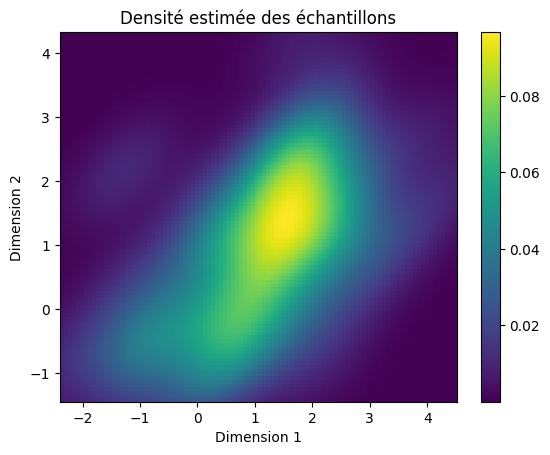

In [6]:
import numpy as np
from scipy.stats import gaussian_kde

seed = 42
np.random.seed(seed)

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution, ce qui correspond au nombre de mots par catégorie
n_samples = 30

# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Utiliser seulement les deux premières dimensions des échantillons
ll_samples_2d = ll_samples[:, :2]

# Créer un modèle KDE avec les échantillons réduits
kde_2d = gaussian_kde(ll_samples_2d.T)

# Évaluer la densité pour les données réduites
x, y = np.meshgrid(np.linspace(ll_samples_2d[:, 0].min(), ll_samples_2d[:, 0].max(), 100),
                   np.linspace(ll_samples_2d[:, 1].min(), ll_samples_2d[:, 1].max(), 100))

positions = np.vstack([x.ravel(), y.ravel()])  # np.vstack empile les tableaux verticalement pour créer un seul tableau à partir de plusieurs tableaux de dimensions compatibles.
density_2d = kde_2d(positions).reshape(x.shape)

# Pour afficher les valeurs de la densité
print("Densité estimée pour les points d'intérêt :")
print(density_2d)
print(len(density_2d))
print(len(density_2d[0]))

# Visualiser la densité estimée
import matplotlib.pyplot as plt
plt.imshow(density_2d, origin='lower', aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.title("Densité estimée des échantillons")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## Utilisation d'une autre librairie 

In [18]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution, ce qui correspond au nombre de mots par catégorie
n_samples = 30

# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Créer un modèle KDE avec les échantillons
kde = KDEMultivariate(data=ll_samples, var_type='c'*ll_samples.shape[1], bw='normal_reference')



# Pour évaluer la densité pour tous les échantillons
density_estimates = kde.pdf(ll_samples)

# Afficher les densités estimées
print("Densité estimée pour le premier échantillon :")
print(density_estimate)
print("Densités estimées pour tous les échantillons :")
print(density_estimates)


ValueError: The number of observations must be larger than the number of variables.

In [20]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution, ce qui correspond au nombre de mots par catégorie
n_samples = 30

# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Créer un modèle KDE avec les échantillons
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(ll_samples)

# Pour évaluer la densité pour une position donnée (par exemple, le premier échantillon)
log_density = kde.score_samples(ll_samples)
density = np.exp(log_density)

# Afficher les densités estimées
print("Densités estimées pour tous les échantillons :")
print(density)


Densités estimées pour tous les échantillons :
[2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196e-122 2.08342196e-122
 2.08342196e-122 2.08342196e-122 2.08342196

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution
n_samples = 30

# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
samples1 = np.random.multivariate_normal(mean1, cov, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov, n_samples)
samples3 = np.random.multivariate_normal(mean3, cov, n_samples)

# Concaténer les échantillons des trois distributions
ll_samples = np.concatenate((samples1, samples2, samples3))

# Calcul de la densité
kde = stats.gaussian_kde(ll_samples.T)
density = kde(ll_samples.T)

# Affichage de certaines statistiques des données
print("Shape of ll_samples:", ll_samples.shape)
print("Densities calculated for samples.")
print("Example density values:", density[:5])

# Pour visualiser les données en 2D ou 3D, vous pouvez créer des sous-échantillons ou des projections
# Exemple : Visualisation des premières dimensions en 2D pour la vérification
plt.figure(figsize=(10, 5))

# Choisir deux dimensions pour une visualisation 2D
dim1 = 0
dim2 = 1

plt.scatter(ll_samples[:, dim1], ll_samples[:, dim2], c=density, cmap='viridis', alpha=0.7)
plt.colorbar(label='Density')
plt.xlabel(f'Dimension {dim1}')
plt.ylabel(f'Dimension {dim2}')
plt.title('2D Projection of the First Two Dimensions')
plt.show()


ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

### New model, utilisation of KDE + distributional distance 

In [1]:
print("test")

import numpy as np
from scipy import stats
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Définir les vecteurs de la moyenne pour les trois distributions
mean1 = np.zeros(300)  # Vecteur de moyenne avec toutes les valeurs à 0
mean2 = np.ones(300)   # Vecteur de moyenne avec toutes les valeurs à 1
mean3 = np.full(300, 2)  # Vecteur de moyenne avec toutes les valeurs à 2

cov = np.identity(300)

# Nombre d'échantillons à générer pour chaque distribution
n_samples = 10

x1_x10 = [np.random.multivariate_normal(mean1, cov, n_samples) for i in range(10)]

x11_x20 = [np.random.multivariate_normal(mean2, cov, n_samples) for i in range(10)]

x21_x30 = [np.random.multivariate_normal(mean3, cov, n_samples) for i in range(10)]


print("x1_x10 :",x1_x10)

print( "On a x1 = X11 , X12 , ... , X110, avec X1i qui correspond à un mot, et on regroupe x1 à x10 car ils vont représenter la meme catégorie de mot et vont normalement etre distribué selon la meme loi")
print(len(x1_x10))
print(len(x1_x10[0]))
print("dimensions des vecteurs X1i : ", len(x1_x10[0][0]))


# Générer des échantillons aléatoires, 3, correspondant aux 3 catégories de mots 
#x1=  np.random.multivariate_normal(mean1, cov, n_samples)  
#x2 = np.random.multivariate_normal(mean2, cov, n_samples)
#x3 = np.random.multivariate_normal(mean3, cov, n_samples)



test
x1_x10 : [array([[-0.20017437,  1.65197469, -0.12511234, ..., -0.25154282,
        -0.01654968,  1.45658294],
       [-0.16248795, -0.53570106,  1.05814564, ...,  0.52818621,
         2.53310575,  0.6307563 ],
       [-0.52343738,  1.14462653, -0.94538819, ..., -0.70675959,
        -1.02820777,  0.89552883],
       ...,
       [ 0.49731978, -0.61231461, -0.84455304, ..., -0.88026847,
        -0.86253084,  0.03464792],
       [-1.58869676,  0.60803567,  1.56315064, ...,  0.00540651,
         0.1542002 ,  0.73370267],
       [ 0.18677567, -0.85218186,  1.96734777, ..., -0.02436015,
         1.13763646,  0.76629073]]), array([[ 3.51780368e-01,  1.36067721e+00,  8.24188234e-01, ...,
         7.85123334e-01,  8.53529880e-04, -7.34191984e-01],
       [-1.72860325e+00,  4.40300062e-01, -2.65791428e-01, ...,
        -2.89144599e-01, -2.06220316e-01,  8.42088018e-01],
       [ 3.15113862e-02, -6.45367536e-01, -2.98458207e-01, ...,
        -7.11251389e-01,  1.82944774e+00,  1.29531289e+00],

# Distributional distance

In [32]:
from math import exp
from scipy.linalg import inv


In [4]:
import numpy as np
from scipy.linalg import inv
from scipy.integrate import nquad
from math import exp, pi
import time

n = 1  # vrai valeur : 30, nombre d'échantillons
d = 2  # vrai valeur : 300

C = (2 * pi) ** (-d / 2)

def Kernel_fonction(x):
    d = len(x)
    H = np.identity(d) if d > 1 else 1  # bandwidth, H à déterminer ensuite, pour le moment on prend juste l'identité
    det_H = (np.linalg.det(H)) if d > 1 else 1
    H_inv = inv(H) if d > 1 else np.array([[1]])
    
    result = np.dot(x.T, np.dot(H_inv, x))
    res = C * (det_H ** -0.5) * exp(-0.5 * result)
    return res

def multivariate_kernel_density_estimation(x, x1_xn):
    '''
    x est un vecteur de taille d, alors que xi est une liste de vecteurs (i=1 à n) qui sont les observations.
    '''
    n = len(x1_xn)
    res = 0

    for xi in x1_xn:
        res += Kernel_fonction(x - xi)
        
    return (1 / n) * res 

def fonction_to_integrate(*args, x1, x2):
    x = np.array(args)
    p1 = multivariate_kernel_density_estimation(x, x1)
    p2 = multivariate_kernel_density_estimation(x, x2)
    return abs(p1 - p2)

def wrapper_fonction_to_integrate(*args):
    return fonction_to_integrate(*args, x1=wrapper_fonction_to_integrate.x1, x2=wrapper_fonction_to_integrate.x2)

def distance_distributionel_a_la_main(x1, x2):
    d = len(x1[0])  # dimension de l'espace
    integration_limits = [(-np.inf, np.inf)] * d  # intégration sur R^d
    
    # Stocker x1 et x2 dans la fonction wrapper
    wrapper_fonction_to_integrate.x1 = x1
    wrapper_fonction_to_integrate.x2 = x2

    result, error = nquad(wrapper_fonction_to_integrate, integration_limits)
    return result

# Tests avec d = 2

print("Série de tests avec d=2 et n=1")
x1 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]
x2 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]

start_time = time.time()
distance = distance_distributionel_a_la_main(x1, x2)
end_time = time.time()
print(f"Distance distributionnelle (premier test avec 2 échantillons identiques) : {distance}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

x1 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]
x2 = [np.array([2.0, 3.0]), np.array([2.5, 3.5])]

start_time = time.time()
distance = distance_distributionel_a_la_main(x1, x2)
end_time = time.time()
print(f"Distance distributionnelle (deuxième test avec 2 échantillons différents) : {distance}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

# Série de tests avec des vecteurs de dimension 3

print("Série de tests avec d=3 et n=1")
d = 3  # mettre à jour la dimension

x1_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]
x2_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]

start_time = time.time()
distance_3d = distance_distributionel_a_la_main(x1_3d, x2_3d)
end_time = time.time()
print(f"Distance distributionnelle (test avec 2 échantillons identiques, dimension 3) : {distance_3d}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

x1_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]
x2_3d = [np.array([2.0, 3.0, 4.0]), np.array([2.5, 3.5, 4.5])]

start_time = time.time()
distance_3d = distance_distributionel_a_la_main(x1_3d, x2_3d)
end_time = time.time()
print(f"Distance distributionnelle (test avec 2 échantillons différents, dimension 3) : {distance_3d}")
print(f"Temps d'exécution: {end_time - start_time} secondes")


Série de tests avec d=2 et n=1
Distance distributionnelle (premier test avec 2 échantillons identiques) : 0.0
Temps d'exécution: 0.11818838119506836 secondes

Distance distributionnelle (deuxième test avec 2 échantillons différents) : 0.9874820244408793
Temps d'exécution: 15.372844934463501 secondes

Série de tests avec d=3 et n=1
Distance distributionnelle (test avec 2 échantillons identiques, dimension 3) : 0.0
Temps d'exécution: 2.591482400894165 secondes

Distance distributionnelle (test avec 2 échantillons différents, dimension 3) : 2.860222307294051
Temps d'exécution: 2071.5354590415955 secondes


## En utilisant les librairies déja implémenter pour KDE

In [3]:
import numpy as np
from scipy.integrate import nquad
from sklearn.neighbors import KernelDensity
import time

def kernel_density_estimation(x, samples, bandwidth=1.0):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(samples)
    log_density = kde.score_samples([x])
    return np.exp(log_density)[0]

def multivariate_kernel_density_estimation(x, samples, bandwidth=1.0):
    return kernel_density_estimation(x, samples, bandwidth)

def fonction_to_integrate(*args, x1, x2, bandwidth=1.0):
    x = np.array(args)
    p1 = multivariate_kernel_density_estimation(x, x1, bandwidth)
    p2 = multivariate_kernel_density_estimation(x, x2, bandwidth)
    return abs(p1 - p2)

def wrapper_fonction_to_integrate(*args):
    return fonction_to_integrate(*args, x1=wrapper_fonction_to_integrate.x1, x2=wrapper_fonction_to_integrate.x2)

def distance_distributionel_a_la_main(x1, x2, bandwidth=1.0):
    d = len(x1[0])  # dimension de l'espace
    integration_limits = [(-np.inf, np.inf)] * d  # intégration sur R^d
    
    # Stocker x1 et x2 dans la fonction wrapper
    wrapper_fonction_to_integrate.x1 = x1
    wrapper_fonction_to_integrate.x2 = x2

    result, error = nquad(wrapper_fonction_to_integrate, integration_limits)
    return result

# Tests avec d = 2

print("Série de tests avec d=2 et n=2")
x1 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]
x2 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]

start_time = time.time()
distance = distance_distributionel_a_la_main(x1, x2)
end_time = time.time()
print(f"Distance distributionnelle (premier test avec 2 échantillons identiques) : {distance}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

x1 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]
x2 = [np.array([2.0, 3.0]), np.array([2.5, 3.5])]

start_time = time.time()
distance = distance_distributionel_a_la_main(x1, x2)
end_time = time.time()
print(f"Distance distributionnelle (deuxième test avec 2 échantillons différents) : {distance}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

# Série de tests avec des vecteurs de dimension 3

print("Série de tests avec d=3 et n=2")
d = 3  # mettre à jour la dimension

x1_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]
x2_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]

start_time = time.time()
distance_3d = distance_distributionel_a_la_main(x1_3d, x2_3d)
end_time = time.time()
print(f"Distance distributionnelle (test avec 2 échantillons identiques, dimension 3) : {distance_3d}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

x1_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]
x2_3d = [np.array([2.0, 3.0, 4.0]), np.array([2.5, 3.5, 4.5])]

start_time = time.time()
distance_3d = distance_distributionel_a_la_main(x1_3d, x2_3d)
end_time = time.time()
print(f"Distance distributionnelle (test avec 2 échantillons différents, dimension 3) : {distance_3d}")
print(f"Temps d'exécution: {end_time - start_time} secondes")


Série de tests avec d=2 et n=2
Distance distributionnelle (premier test avec 2 échantillons identiques) : 0.0
Temps d'exécution: 0.8705854415893555 secondes

Distance distributionnelle (deuxième test avec 2 échantillons différents) : 0.9874820244408793
Temps d'exécution: 132.58160090446472 secondes

Série de tests avec d=3 et n=2
Distance distributionnelle (test avec 2 échantillons identiques, dimension 3) : 0.0
Temps d'exécution: 23.546690225601196 secondes



KeyboardInterrupt: 

In [2]:
print("test")

test


In [5]:
import numpy as np
from scipy.linalg import inv
from scipy.stats import multivariate_normal
from math import exp, pi
import time

n = 1  # vrai valeur : 30, nombre d'échantillons
d = 2  # vrai valeur : 300

C = (2 * pi) ** (-d / 2)

def Kernel_fonction(x):
    d = len(x)
    H = np.identity(d) if d > 1 else 1  # bandwidth, H à déterminer ensuite, pour le moment on prend juste l'identité
    det_H = (np.linalg.det(H)) if d > 1 else 1
    H_inv = inv(H) if d > 1 else np.array([[1]])
    
    result = np.dot(x.T, np.dot(H_inv, x))
    res = C * (det_H ** -0.5) * exp(-0.5 * result)
    return res

def multivariate_kernel_density_estimation(x, x1_xn):
    n = len(x1_xn)
    res = 0

    for xi in x1_xn:
        res += Kernel_fonction(x - xi)
        
    return (1 / n) * res 

def distance_distributionel_a_la_main(x1, x2, grid_points=1000):
    d = len(x1[0])  # dimension de l'espace

    # Génération de points de grille dans l'espace de dimension d
    lower_bound = -10
    upper_bound = 10
    grid = np.random.uniform(lower_bound, upper_bound, (grid_points, d))
    print(grid)
    
    total_difference = 0
    for point in grid:
        p1 = multivariate_kernel_density_estimation(point, x1)
        p2 = multivariate_kernel_density_estimation(point, x2)
        total_difference += abs(p1 - p2)
    
    volume = (upper_bound - lower_bound) ** d
    return total_difference * volume / grid_points

# Tests avec d = 2

print("Série de tests avec d=2 et n=1")
x1 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]
x2 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]

start_time = time.time()
distance = distance_distributionel_a_la_main(x1, x2)
end_time = time.time()
print(f"Distance distributionnelle (premier test avec 2 échantillons identiques) : {distance}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

x1 = [np.array([1.0, 2.0]), np.array([1.5, 2.5])]
x2 = [np.array([2.0, 3.0]), np.array([2.5, 3.5])]

start_time = time.time()
distance = distance_distributionel_a_la_main(x1, x2)
end_time = time.time()
print(f"Distance distributionnelle (deuxième test avec 2 échantillons différents) : {distance}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

# Série de tests avec des vecteurs de dimension 3

print("Série de tests avec d=3 et n=1")
d = 3  # mettre à jour la dimension

x1_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]
x2_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]

start_time = time.time()
distance_3d = distance_distributionel_a_la_main(x1_3d, x2_3d)
end_time = time.time()
print(f"Distance distributionnelle (test avec 2 échantillons identiques, dimension 3) : {distance_3d}")
print(f"Temps d'exécution: {end_time - start_time} secondes\n")

x1_3d = [np.array([1.0, 2.0, 3.0]), np.array([1.5, 2.5, 3.5])]
x2_3d = [np.array([2.0, 3.0, 4.0]), np.array([2.5, 3.5, 4.5])]

start_time = time.time()
distance_3d = distance_distributionel_a_la_main(x1_3d, x2_3d)
end_time = time.time()
print(f"Distance distributionnelle (test avec 2 échantillons différents, dimension 3) : {distance_3d}")
print(f"Temps d'exécution: {end_time - start_time} secondes")


Série de tests avec d=2 et n=1
[[-5.37218588  6.87065699]
 [-6.69796064 -1.30038443]
 [ 8.42965751  0.29009843]
 ...
 [-5.54824519  2.07785977]
 [-2.95856508  9.20609775]
 [ 4.67285559  4.54316759]]
Distance distributionnelle (premier test avec 2 échantillons identiques) : 0.0
Temps d'exécution: 0.14567995071411133 secondes

[[ 7.12229018  1.58034434]
 [-8.74412655  5.31531651]
 [ 7.27200097  7.72583528]
 ...
 [ 8.98162641 -5.00352383]
 [-1.72803017 -6.78872354]
 [ 7.6292856  -9.65031705]]
Distance distributionnelle (deuxième test avec 2 échantillons différents) : 1.2290897759059294
Temps d'exécution: 0.14899492263793945 secondes

Série de tests avec d=3 et n=1
[[ 6.88985544 -1.18713553  2.6758248 ]
 [ 9.96715211  8.54285043 -0.9821623 ]
 [-5.67937034 -5.28272984 -4.79685199]
 ...
 [-1.34820926 -5.44062757  5.5456633 ]
 [ 1.73117043 -3.87076869  2.32403935]
 [ 6.03172586  0.74855505  3.54896474]]
Distance distributionnelle (test avec 2 échantillons identiques, dimension 3) : 0.0
Temps 